###LIBRARY

In [ ]:
!pip install nltk

In [ ]:
pip install deep_translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.1 MB/s eta 0:00:00


In [ ]:
!pip install matplotlib

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install numpy

In [ ]:
pip install seaborn

In [ ]:
!pip install wordcloud

## Import File

In [ ]:
import pandas as pd

# Baca data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/Data (6)/Data.csv', encoding='latin1')
data

Ulasan Label Data
0    Ni seperti terjemahan ncpt sangat bantu bila g...    Positif
1    Bagus. Buku sesuai permintaan. Oke deh. Terima...    Positif
2                 Alhamdulillah.ke 3 order sangat baik    Positif
3       Bukunya bagus bangett, cuma belom sempet foto.    Positif
4                                     Bagus karena ori    Positif
..                                                 ...        ...
650       Feedback negatif karena menolak 5 transaksi.    Negatif
651  Perekat halaman buku gampang sobek, sehingga b...    Negatif
652  Pelapak tidak dapat melayani pemesanan melalui...    Negatif
653  Pelapak mendapatkan 3 feedback negatif karena ...    Negatif
654  Buku pembahasan ON MIPA PT fisika modern tidak...    Negatif

[655 rows x 2 columns]

###Preprocessing

In [ ]:
import nltk
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
import pandas as pd
from deep_translator import GoogleTranslator

# Fungsi Translate DeepTrans
def translate_teks_deeptrans(teks, target_lang='id'):
    translated_text = GoogleTranslator(source='en', target=target_lang).translate(teks)
    return translated_text

# Menerapkan Fungsi Terjemahan ke Kolom 'Ulasan'
data['Ulasan'] = data['Ulasan'].apply(lambda x: translate_teks_deeptrans(x))

# Menyimpan DataFrame ke dalam file CSV
data.to_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/hasil_translasi.csv', index=False)

# Tampilkan DataFrame setelah translasi
display(data)

Ulasan Label Data
0    Ni seperti terjemahan ncpt sangat membantu bil...    Positif
1    Bagus. Buku sesuai permintaan. Oke deh. Terima...    Positif
2               Alhamdulillah.ke 3 pesanan sangat baik    Positif
3       Bukunya bagus banget, cuman belom sempet foto.    Positif
4                                     Bagus karena ori    Positif
..                                                 ...        ...
650    Umpan balik negatif karena menolak 5 transaksi.    Negatif
651  Perekat halaman buku mudah sobek, sehingga ban...    Negatif
652  Pelapak tidak dapat melayani pemesanan melalui...    Negatif
653  Pelapak mendapatkan 3 feedback negatif karena ...    Negatif
654  Buku pembahasan TENTANG MIPA PT fisika modern ...    Negatif

[655 rows x 2 columns]

In [ ]:
# case folding
def casefolding(teks):
    teks = teks.lower()
    return teks
data['Ulasan'] = data['Ulasan'].apply(casefolding)

# Menyimpan DataFrame ke dalam file CSV
data.to_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/hasil_casefolding.csv', index=False)
data

Ulasan Label Data
0    ni seperti terjemahan ncpt sangat membantu bil...    Positif
1    bagus. buku sesuai permintaan. oke deh. terima...    Positif
2               alhamdulillah.ke 3 pesanan sangat baik    Positif
3       bukunya bagus banget, cuman belom sempet foto.    Positif
4                                     bagus karena ori    Positif
..                                                 ...        ...
650    umpan balik negatif karena menolak 5 transaksi.    Negatif
651  perekat halaman buku mudah sobek, sehingga ban...    Negatif
652  pelapak tidak dapat melayani pemesanan melalui...    Negatif
653  pelapak mendapatkan 3 feedback negatif karena ...    Negatif
654  buku pembahasan tentang mipa pt fisika modern ...    Negatif

[655 rows x 2 columns]

In [ ]:
import re

def cleansing(teks):
    teks = teks.strip(" ")
    teks = re.sub(r'[?|$|.|!_:()\-+,/#%]', '', teks)
    teks = re.sub(r'\b\d+\b', '', teks)
    teks = re.sub(r"\b[a-zA-Z]\b", "", teks)
    teks = re.sub('\s+', ' ', teks)
    teks = re.sub(r'[\U00010000-\U0010ffff]', '', teks)
    teks = re.sub(r'[\U00002000-\U00003000]', '', teks)
    return teks

data['Ulasan'] = data['Ulasan'].apply(cleansing)
data.to_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/hasil_cleansing.csv', index=False)
data

Ulasan Label Data
0    ni seperti terjemahan ncpt sangat membantu bil...    Positif
1    bagus buku sesuai permintaan oke deh terima ka...    Positif
2                  alhamdulillahke pesanan sangat baik    Positif
3         bukunya bagus banget cuman belom sempet foto    Positif
4                                     bagus karena ori    Positif
..                                                 ...        ...
650       umpan balik negatif karena menolak transaksi    Negatif
651  perekat halaman buku mudah sobek sehingga bany...    Negatif
652  pelapak tidak dapat melayani pemesanan melalui...    Negatif
653  pelapak mendapatkan feedback negatif karena ti...    Negatif
654  buku pembahasan tentang mipa pt fisika modern ...    Negatif

[655 rows x 2 columns]

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

#NLTK word tokenize
def word_tokenize_wrapper(teks):
 return word_tokenize(teks)

data['Ulasan'] = data['Ulasan'].apply(word_tokenize_wrapper)
data.to_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/hasil_tokenisasi.csv', index=False)
data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Ulasan Label Data
0    [ni, seperti, terjemahan, ncpt, sangat, memban...    Positif
1    [bagus, buku, sesuai, permintaan, oke, deh, te...    Positif
2             [alhamdulillahke, pesanan, sangat, baik]    Positif
3    [bukunya, bagus, banget, cuman, belom, sempet,...    Positif
4                                 [bagus, karena, ori]    Positif
..                                                 ...        ...
650  [umpan, balik, negatif, karena, menolak, trans...    Negatif
651  [perekat, halaman, buku, mudah, sobek, sehingg...    Negatif
652  [pelapak, tidak, dapat, melayani, pemesanan, m...    Negatif
653  [pelapak, mendapatkan, feedback, negatif, kare...    Negatif
654  [buku, pembahasan, tentang, mipa, pt, fisika, ...    Negatif

[655 rows x 2 columns]

In [ ]:
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(teks):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in teks:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    return d_clean

data['Ulasan'] = data['Ulasan'].apply(stemming)
data.to_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/hasil_stemming.csv', index=False)
data

Ulasan Label Data
0    ni seperti terjemah ncpt sangat bantu bila gak...    Positif
1    bagus buku sesuai minta oke deh terima kasih yaaa    Positif
2                    alhamdulillahke pesan sangat baik    Positif
3              buku bagus banget cuman bom sempet foto    Positif
4                                     bagus karena ori    Positif
..                                                 ...        ...
650         umpan balik negatif karena tolak transaksi    Negatif
651  rekat halaman buku mudah sobek sehingga banyak...    Negatif
652    lapak tidak dapat layan mesan lalu sistem bayar    Negatif
653  lapak dapat feedback negatif karena tidak kiri...    Negatif
654  buku bahas tentang mipa pt fisika modern tidak...    Negatif

[655 rows x 2 columns]

In [ ]:
data = data[data['Ulasan'].apply(len) > 0]
data.to_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/hasil_preprocessing.csv', index=False)
data_clean = pd.read_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/hasil_preprocessing.csv', encoding='latin1')
data_clean

Ulasan Label Data
0    ni seperti terjemah ncpt sangat bantu bila gak...    Positif
1    bagus buku sesuai minta oke deh terima kasih yaaa    Positif
2                    alhamdulillahke pesan sangat baik    Positif
3              buku bagus banget cuman bom sempet foto    Positif
4                                     bagus karena ori    Positif
..                                                 ...        ...
650         umpan balik negatif karena tolak transaksi    Negatif
651  rekat halaman buku mudah sobek sehingga banyak...    Negatif
652    lapak tidak dapat layan mesan lalu sistem bayar    Negatif
653  lapak dapat feedback negatif karena tidak kiri...    Negatif
654  buku bahas tentang mipa pt fisika modern tidak...    Negatif

[655 rows x 2 columns]

In [ ]:
import pandas as pd

# Mengambil kolom terakhir
target = data_clean.iloc[:, -1]
target = target.replace({'Negatif': 0, 'Positif': 1})
target.to_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/labeldata.csv', index=False)
target = pd.read_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/labeldata.csv', encoding='latin1')

# Tampilkan hasilnya
display(target)

Label Data
0             1
1             1
2             1
3             1
4             1
..          ...
650           0
651           0
652           0
653           0
654           0

[655 rows x 1 columns]

###Pembobotan Kata TF-IDF

In [ ]:
import pandas as pd

# Menghitung Term Frequency (TF) untuk setiap kata dalam setiap dokumen
tf_matrix = pd.DataFrame(0, index=data_clean.index, columns=data_clean['Ulasan'].str.split().explode().unique())

for i, dokumen in enumerate(data_clean['Ulasan']):
    # Penanganan nilai NaN
    if isinstance(dokumen, str):
        kata_dalam_dokumen = dokumen.split()
        for kata in kata_dalam_dokumen:
            tf_matrix.at[i, kata] += 1

tf_matrix.to_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/hasil_tf.csv', index=False)
print("TF Matrix:")
display(tf_matrix)


TF Matrix:


ni  seperti  terjemah  ncpt  sangat  bantu  bila  gak  ahli  bhs  ...  \
0     1        1         1     2       1      1     1    1     1    1  ...   
1     0        0         0     0       0      0     0    0     0    0  ...   
2     0        0         0     0       1      0     0    0     0    0  ...   
3     0        0         0     0       0      0     0    0     0    0  ...   
4     0        0         0     0       0      0     0    0     0    0  ...   
..   ..      ...       ...   ...     ...    ...   ...  ...   ...  ...  ...   
650   0        0         0     0       0      0     0    0     0    0  ...   
651   0        0         0     0       0      0     0    0     0    0  ...   
652   0        0         0     0       0      0     0    0     0    0  ...   
653   0        0         0     0       0      0     0    0     0    0  ...   
654   0        0         0     0       0      0     0    0     0    0  ...   

     but  not  bad  rekat  sobek  ulang  mipa  pt  fisika  modern  
0      0    0    0      0      0      0     0   0       0       0  
1      0    0    0      0      0      0     0   0       0       0  
2      0    0    0      0      0      0     0   0       0       0  
3      0    0    0      0      0      0     0   0       0       0  
4      0    0    0      0      0      0     0   0       0       0  
..   ...  ...  ...    ...    ...    ...   ...  ..     ...     ...  
650    0    0    0      0      0      0     0   0       0       0  
651    0    0    0      1      1      1     0   0       0       0  
652    0    0    0      0      0      0     0   0       0       0  
653    0    0    0      0      0      0     0   0       0       0  
654    0    0    0      0      0      0     1   1       1       1  

[655 rows x 764 columns]

In [ ]:
import pandas as pd
import numpy as np

# Menghitung Weighted Term Frequency (WTF)
wtf = np.where(tf_matrix > 0, 1 + np.log10(tf_matrix), 0)
wtf_matrix = pd.DataFrame(wtf, columns=tf_matrix.columns, index=tf_matrix.index)

wtf_matrix.to_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/hasil_wtf.csv', index=False)

# Menampilkan hasil
print("\nWTF Matrix:")
display(wtf_matrix)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)



WTF Matrix:


ni  seperti  terjemah     ncpt  sangat  bantu  bila  gak  ahli  bhs  \
0    1.0      1.0       1.0  1.30103     1.0    1.0   1.0  1.0   1.0  1.0   
1    0.0      0.0       0.0  0.00000     0.0    0.0   0.0  0.0   0.0  0.0   
2    0.0      0.0       0.0  0.00000     1.0    0.0   0.0  0.0   0.0  0.0   
3    0.0      0.0       0.0  0.00000     0.0    0.0   0.0  0.0   0.0  0.0   
4    0.0      0.0       0.0  0.00000     0.0    0.0   0.0  0.0   0.0  0.0   
..   ...      ...       ...      ...     ...    ...   ...  ...   ...  ...   
650  0.0      0.0       0.0  0.00000     0.0    0.0   0.0  0.0   0.0  0.0   
651  0.0      0.0       0.0  0.00000     0.0    0.0   0.0  0.0   0.0  0.0   
652  0.0      0.0       0.0  0.00000     0.0    0.0   0.0  0.0   0.0  0.0   
653  0.0      0.0       0.0  0.00000     0.0    0.0   0.0  0.0   0.0  0.0   
654  0.0      0.0       0.0  0.00000     0.0    0.0   0.0  0.0   0.0  0.0   

     ...  but  not  bad  rekat  sobek  ulang  mipa   pt  fisika  modern  
0    ...  0.0  0.0  0.0    0.0    0.0    0.0   0.0  0.0     0.0     0.0  
1    ...  0.0  0.0  0.0    0.0    0.0    0.0   0.0  0.0     0.0     0.0  
2    ...  0.0  0.0  0.0    0.0    0.0    0.0   0.0  0.0     0.0     0.0  
3    ...  0.0  0.0  0.0    0.0    0.0    0.0   0.0  0.0     0.0     0.0  
4    ...  0.0  0.0  0.0    0.0    0.0    0.0   0.0  0.0     0.0     0.0  
..   ...  ...  ...  ...    ...    ...    ...   ...  ...     ...     ...  
650  ...  0.0  0.0  0.0    0.0    0.0    0.0   0.0  0.0     0.0     0.0  
651  ...  0.0  0.0  0.0    1.0    1.0    1.0   0.0  0.0     0.0     0.0  
652  ...  0.0  0.0  0.0    0.0    0.0    0.0   0.0  0.0     0.0     0.0  
653  ...  0.0  0.0  0.0    0.0    0.0    0.0   0.0  0.0     0.0     0.0  
654  ...  0.0  0.0  0.0    0.0    0.0    0.0   1.0  1.0     1.0     1.0  

[655 rows x 764 columns]

In [ ]:
# Menghitung Document Frequency (DF) untuk setiap kata
df_matrix = (tf_matrix > 0).sum()

df_matrix.to_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/hasil_df.csv', index=False)

print("\nDF Matrix:")
display(df_matrix)


DF Matrix:


ni           2
seperti      4
terjemah     1
ncpt         1
sangat      45
            ..
ulang        1
mipa         1
pt           1
fisika       1
modern       1
Length: 764, dtype: int64

In [ ]:
import math

# Menghitung Inverse Document Frequency (IDF) untuk setiap kata
idf_matrix = pd.Series(0, index=tf_matrix.columns)

for kata in idf_matrix.index:
    df_kata = (tf_matrix[kata] > 0).sum()
    idf_matrix.at[kata] = math.log10(len(data_clean) / (df_kata))

idf_matrix.to_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/hasil_idf.csv', index=False)

print("\nIDF Matrix:")
display(idf_matrix)


IDF Matrix:


ni          2.515211
seperti     2.214181
terjemah    2.816241
ncpt        2.816241
sangat      1.163029
              ...   
ulang       2.816241
mipa        2.816241
pt          2.816241
fisika      2.816241
modern      2.816241
Length: 764, dtype: float64

In [ ]:
# Menghitung TF-IDF
tfidf_matrix = wtf_matrix * idf_matrix

tfidf_matrix.to_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/hasil_tfidf.csv', index=False)

print("\nTF-IDF Matrix:")
display(tfidf_matrix)


TF-IDF Matrix:


ni   seperti  terjemah      ncpt    sangat    bantu      bila  \
0    2.515211  2.214181  2.816241  3.664014  1.163029  2.33912  2.816241   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
2    0.000000  0.000000  0.000000  0.000000  1.163029  0.00000  0.000000   
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
..        ...       ...       ...       ...       ...      ...       ...   
650  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
651  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
652  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
653  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
654  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   

          gak      ahli       bhs  ...  but  not  bad     rekat     sobek  \
0    2.515211  2.515211  2.816241  ...  0.0  0.0  0.0  0.000000  0.000000   
1    0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.000000  0.000000   
2    0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.000000  0.000000   
3    0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.000000  0.000000   
4    0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.000000  0.000000   
..        ...       ...       ...  ...  ...  ...  ...       ...       ...   
650  0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.000000  0.000000   
651  0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  2.816241  2.816241   
652  0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.000000  0.000000   
653  0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.000000  0.000000   
654  0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.000000  0.000000   

        ulang      mipa        pt    fisika    modern  
0    0.000000  0.000000  0.000000  0.000000  0.000000  
1    0.000000  0.000000  0.000000  0.000000  0.000000  
2    0.000000  0.000000  0.000000  0.000000  0.000000  
3    0.000000  0.000000  0.000000  0.000000  0.000000  
4    0.000000  0.000000  0.000000  0.000000  0.000000  
..        ...       ...       ...       ...       ...  
650  0.000000  0.000000  0.000000  0.000000  0.000000  
651  2.816241  0.000000  0.000000  0.000000  0.000000  
652  0.000000  0.000000  0.000000  0.000000  0.000000  
653  0.000000  0.000000  0.000000  0.000000  0.000000  
654  0.000000  2.816241  2.816241  2.816241  2.816241  

[655 rows x 764 columns]

###Pembobotan Lexicon Based Features

In [ ]:
import pandas as pd

# Lexicon (contoh)
positif_lexicon = pd.read_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/positive.txt')
negatif_lexicon = pd.read_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/negative.txt')

# Inisialisasi kolom bobot
data_clean['Lexicon_Positif'] = 0
data_clean['Lexicon_Negatif'] = 0

# Pembobotan berdasarkan leksikon
for i, ulasan in enumerate(data_clean['Ulasan']):
    # Penanganan nilai NaN
    if isinstance(ulasan, str):
        for kata_positif in positif_lexicon.values.flatten():
            if kata_positif in ulasan.lower():
                data_clean.at[i, 'Lexicon_Positif'] += 1

        for kata_negatif in negatif_lexicon.values.flatten():
            if kata_negatif in ulasan.lower():
                data_clean.at[i, 'Lexicon_Negatif'] += 1

data_clean.to_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/hasil_lexicon.csv', index=False)
display(data_clean)

Ulasan Label Data  \
0    ni seperti terjemah ncpt sangat bantu bila gak...    Positif   
1    bagus buku sesuai minta oke deh terima kasih yaaa    Positif   
2                    alhamdulillahke pesan sangat baik    Positif   
3              buku bagus banget cuman bom sempet foto    Positif   
4                                     bagus karena ori    Positif   
..                                                 ...        ...   
650         umpan balik negatif karena tolak transaksi    Negatif   
651  rekat halaman buku mudah sobek sehingga banyak...    Negatif   
652    lapak tidak dapat layan mesan lalu sistem bayar    Negatif   
653  lapak dapat feedback negatif karena tidak kiri...    Negatif   
654  buku bahas tentang mipa pt fisika modern tidak...    Negatif   

     Lexicon_Positif  Lexicon_Negatif  
0                  3                1  
1                  4                1  
2                  4                1  
3                  1                1  
4                  1                0  
..               ...              ...  
650                0                2  
651                4                5  
652                0                2  
653                2                4  
654                1                2  

[655 rows x 4 columns]

In [ ]:
import pandas as pd

# Mengambil kolom ketiga dan keempat
bobot_lexicon = data_clean.iloc[:, 2:4]
bobot_lexicon = bobot_lexicon.astype(float)

# Tampilkan hasilnya
display(bobot_lexicon)

Lexicon_Positif  Lexicon_Negatif
0                3.0              1.0
1                4.0              1.0
2                4.0              1.0
3                1.0              1.0
4                1.0              0.0
..               ...              ...
650              0.0              2.0
651              4.0              5.0
652              0.0              2.0
653              2.0              4.0
654              1.0              2.0

[655 rows x 2 columns]

###Penggabungan TF-IDF dan Lexicon Based

In [ ]:
dataset= pd.concat([tfidf_matrix, bobot_lexicon], axis=1)
dataset.to_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/tfidf_lexicon.csv', index=False)
dataset = pd.read_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/tfidf_lexicon.csv', encoding='latin1')
display(dataset)

ni   seperti  terjemah      ncpt    sangat    bantu      bila  \
0    2.515211  2.214181  2.816241  3.664014  1.163029  2.33912  2.816241   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
2    0.000000  0.000000  0.000000  0.000000  1.163029  0.00000  0.000000   
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
..        ...       ...       ...       ...       ...      ...       ...   
650  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
651  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
652  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
653  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
654  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   

          gak      ahli       bhs  ...  bad     rekat     sobek     ulang  \
0    2.515211  2.515211  2.816241  ...  0.0  0.000000  0.000000  0.000000   
1    0.000000  0.000000  0.000000  ...  0.0  0.000000  0.000000  0.000000   
2    0.000000  0.000000  0.000000  ...  0.0  0.000000  0.000000  0.000000   
3    0.000000  0.000000  0.000000  ...  0.0  0.000000  0.000000  0.000000   
4    0.000000  0.000000  0.000000  ...  0.0  0.000000  0.000000  0.000000   
..        ...       ...       ...  ...  ...       ...       ...       ...   
650  0.000000  0.000000  0.000000  ...  0.0  0.000000  0.000000  0.000000   
651  0.000000  0.000000  0.000000  ...  0.0  2.816241  2.816241  2.816241   
652  0.000000  0.000000  0.000000  ...  0.0  0.000000  0.000000  0.000000   
653  0.000000  0.000000  0.000000  ...  0.0  0.000000  0.000000  0.000000   
654  0.000000  0.000000  0.000000  ...  0.0  0.000000  0.000000  0.000000   

         mipa        pt    fisika    modern  Lexicon_Positif  Lexicon_Negatif  
0    0.000000  0.000000  0.000000  0.000000              3.0              1.0  
1    0.000000  0.000000  0.000000  0.000000              4.0              1.0  
2    0.000000  0.000000  0.000000  0.000000              4.0              1.0  
3    0.000000  0.000000  0.000000  0.000000              1.0              1.0  
4    0.000000  0.000000  0.000000  0.000000              1.0              0.0  
..        ...       ...       ...       ...              ...              ...  
650  0.000000  0.000000  0.000000  0.000000              0.0              2.0  
651  0.000000  0.000000  0.000000  0.000000              4.0              5.0  
652  0.000000  0.000000  0.000000  0.000000              0.0              2.0  
653  0.000000  0.000000  0.000000  0.000000              2.0              4.0  
654  2.816241  2.816241  2.816241  2.816241              1.0              2.0  

[655 rows x 766 columns]


###LVQ

In [ ]:
import numpy as np

def lvq_fit(train, target, learning_rate, b, max_epoch):
    label, train_idx = np.unique(target, return_index=True)
    weight = train[train_idx].astype(np.float64)
    train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])
    train, target = train[:, 0], train[:, 1]
    epoch = 0

    while epoch < max_epoch:
        for i, x in enumerate(train):
            distance = [sum((w - x) ** 2) for w in weight]
            min_index = np.argmin(distance)
            sign = 1 if target[i] == label[min_index] else -1
            weight[min_index] += sign * learning_rate * (x - weight[min_index])

        learning_rate *= b
        epoch += 1

    return weight, label


In [ ]:
def lvq_predict(X, model):
  center, label = model
  Y = []

  for x in X:
    d = [sum((c - x) ** 2) for c in center]
    Y.append(label[np.argmin(d)])

  return Y

## Dataset & Target

In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/tfidf_lexicon.csv', encoding='latin1')
display(dataset)

ni   seperti  terjemah      ncpt    sangat    bantu      bila  \
0    2.515211  2.214181  2.816241  3.664014  1.163029  2.33912  2.816241   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
2    0.000000  0.000000  0.000000  0.000000  1.163029  0.00000  0.000000   
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
..        ...       ...       ...       ...       ...      ...       ...   
650  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
651  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
652  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
653  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
654  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   

          gak      ahli       bhs  ...  bad     rekat     sobek     ulang  \
0    2.515211  2.515211  2.816241  ...  0.0  0.000000  0.000000  0.000000   
1    0.000000  0.000000  0.000000  ...  0.0  0.000000  0.000000  0.000000   
2    0.000000  0.000000  0.000000  ...  0.0  0.000000  0.000000  0.000000   
3    0.000000  0.000000  0.000000  ...  0.0  0.000000  0.000000  0.000000   
4    0.000000  0.000000  0.000000  ...  0.0  0.000000  0.000000  0.000000   
..        ...       ...       ...  ...  ...       ...       ...       ...   
650  0.000000  0.000000  0.000000  ...  0.0  0.000000  0.000000  0.000000   
651  0.000000  0.000000  0.000000  ...  0.0  2.816241  2.816241  2.816241   
652  0.000000  0.000000  0.000000  ...  0.0  0.000000  0.000000  0.000000   
653  0.000000  0.000000  0.000000  ...  0.0  0.000000  0.000000  0.000000   
654  0.000000  0.000000  0.000000  ...  0.0  0.000000  0.000000  0.000000   

         mipa        pt    fisika    modern  Lexicon_Positif  Lexicon_Negatif  
0    0.000000  0.000000  0.000000  0.000000              3.0              1.0  
1    0.000000  0.000000  0.000000  0.000000              4.0              1.0  
2    0.000000  0.000000  0.000000  0.000000              4.0              1.0  
3    0.000000  0.000000  0.000000  0.000000              1.0              1.0  
4    0.000000  0.000000  0.000000  0.000000              1.0              0.0  
..        ...       ...       ...       ...              ...              ...  
650  0.000000  0.000000  0.000000  0.000000              0.0              2.0  
651  0.000000  0.000000  0.000000  0.000000              4.0              5.0  
652  0.000000  0.000000  0.000000  0.000000              0.0              2.0  
653  0.000000  0.000000  0.000000  0.000000              2.0              4.0  
654  2.816241  2.816241  2.816241  2.816241              1.0              2.0  

[655 rows x 766 columns]

In [ ]:
import pandas as pd
target = pd.read_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/labeldata.csv', encoding='latin1')
display(target)

Label Data
0             1
1             1
2             1
3             1
4             1
..          ...
650           0
651           0
652           0
653           0
654           0

[655 rows x 1 columns]

## Pengujian Alpha


### alpha = 0,000000001

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



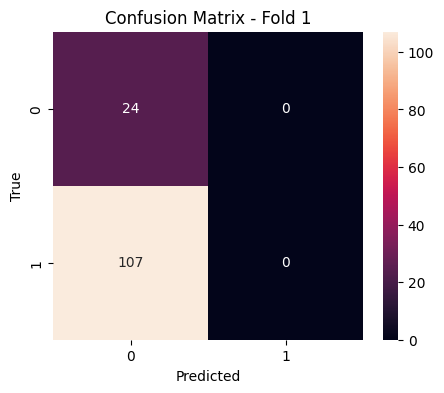

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



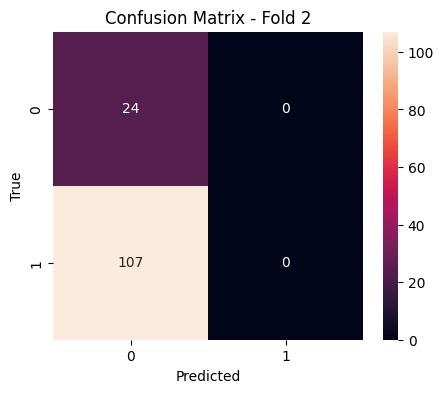

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 21.37%
  Precision = 1.0
  Recall = 0.037383177570093455
  F1-Score = 0.07207207207207207
  Confusion Matrix:
[[ 24   0]
 [103   4]]



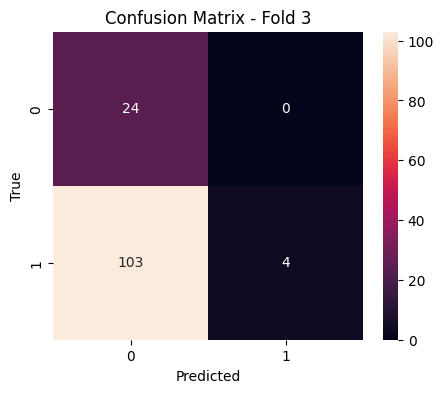

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



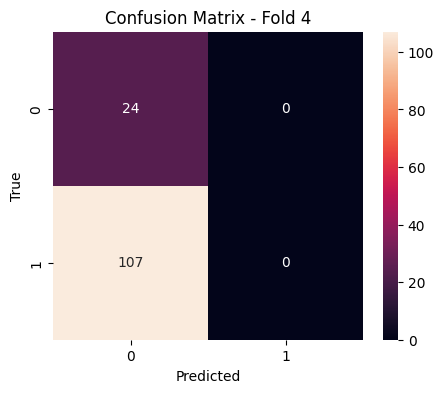

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 19.08%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 25   0]
 [106   0]]



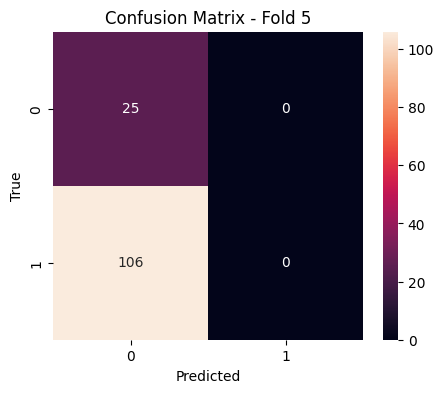

Average TP: 0.8
Average TN: 24.2
Average FP: 0.0
Average FN: 106.0
Average Accuracy: 19.08%
Average Precision: 1.0
Average Recall: 0.007490636704119851
Average F1-Score: 0.014869888475836432



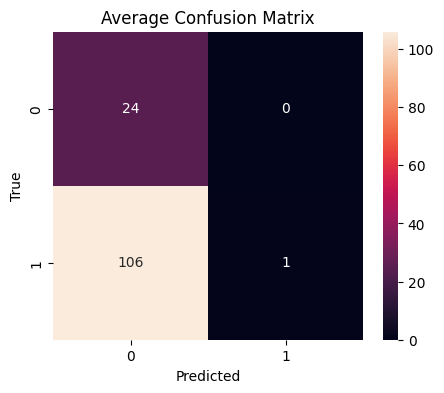

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.000000001, b=0.1, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


<ipython-input-25-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 1:
  Accuracy = 18.32%
  Precision = 3.36%
  Recall = 18.32%
  F1-Score = 5.67%

  Confusion Matrix:
[[ 24   0]
 [107   0]]



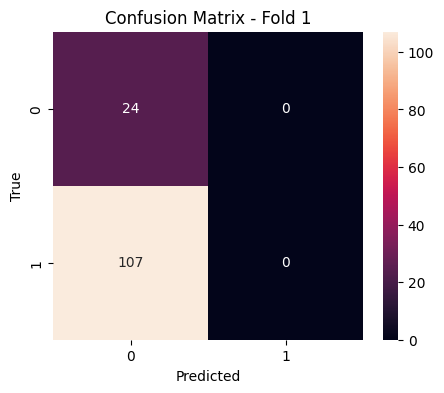

<ipython-input-25-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 2:
  Accuracy = 18.32%
  Precision = 3.36%
  Recall = 18.32%
  F1-Score = 5.67%

  Confusion Matrix:
[[ 24   0]
 [107   0]]



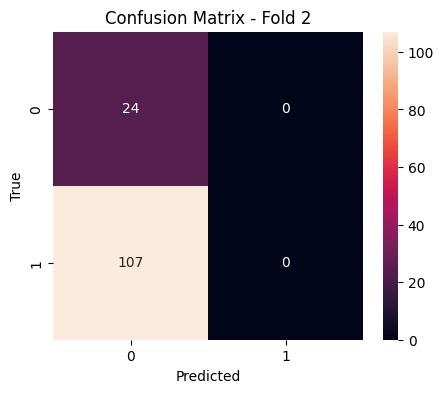

<ipython-input-25-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])



Fold 3:
  Accuracy = 21.37%
  Precision = 85.14%
  Recall = 21.37%
  F1-Score = 11.71%

  Confusion Matrix:
[[ 24   0]
 [103   4]]



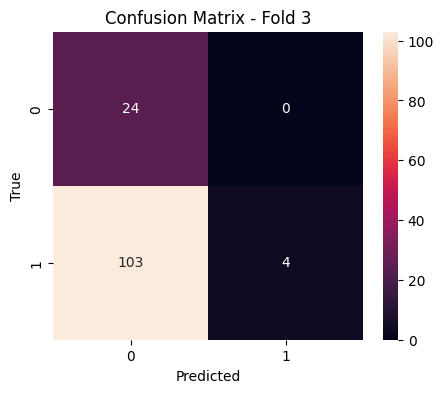

<ipython-input-25-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 4:
  Accuracy = 18.32%
  Precision = 3.36%
  Recall = 18.32%
  F1-Score = 5.67%

  Confusion Matrix:
[[ 24   0]
 [107   0]]



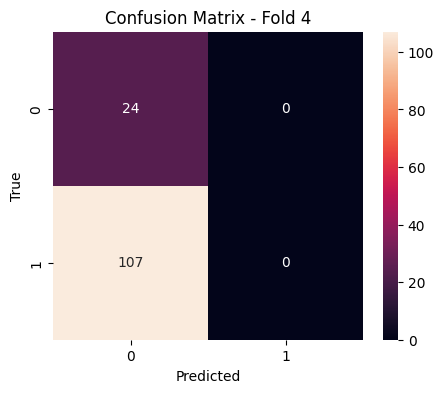

<ipython-input-25-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 5:
  Accuracy = 19.08%
  Precision = 3.64%
  Recall = 19.08%
  F1-Score = 6.12%

  Confusion Matrix:
[[ 25   0]
 [106   0]]



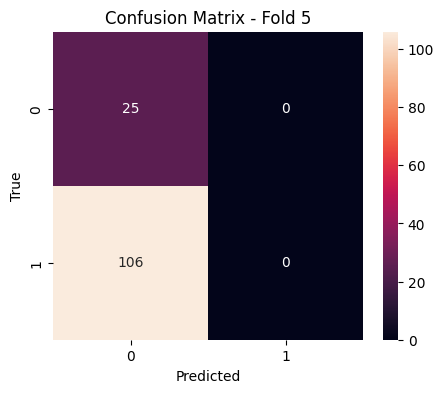


Rata-rata semua fold : 
Average Accuracy: 19.08%
Average Precision: 19.77%
Average Recall: 19.08%
Average F1-Score: 6.97%


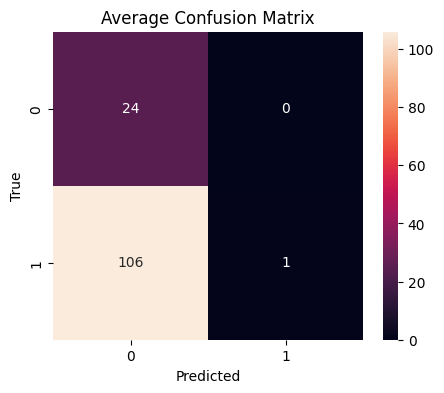

In [ ]:
Dimport numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.000000001, b=0.1, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Calculate accuracy
    accuracy = accuracy_score(output, y_test)
    recall = recall_score(y_test, output, average='weighted')
    precision = precision_score(y_test, output, average='weighted')
    f1 = f1_score(y_test, output, average='weighted')
    print()

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    # Convert precision, recall, and f1-score to percentage
    accuracy_percetange = np.mean(accuracy)*100
    precision_percentage = precision * 100
    recall_percentage = recall * 100
    f1_percentage = f1 * 100
    print(f'  Accuracy = {accuracy_percetange:.2f}%')
    print(f'  Precision = {precision_percentage:.2f}%')
    print(f'  Recall = {recall_percentage:.2f}%')
    print(f'  F1-Score = {f1_percentage:.2f}%')
    print()
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # plt.figure(figsize=(5, 4))
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()
    print()

# Print average metrics
print('Rata-rata semua fold : ')
average_accuracy_percentage = np.mean(accuracy_list) * 100
average_precision_percentage = np.mean(precision_list) * 100
average_recall_percentage = np.mean(recall_list) * 100
average_f1_percentage = np.mean(f1_list) * 100

print(f'Average Accuracy: {average_accuracy_percentage:.2f}%')
print(f'Average Precision: {average_precision_percentage:.2f}%')
print(f'Average Recall: {average_recall_percentage:.2f}%')
print(f'Average F1-Score: {average_f1_percentage:.2f}%')


# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5,4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

### alpha = 0,00000001

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



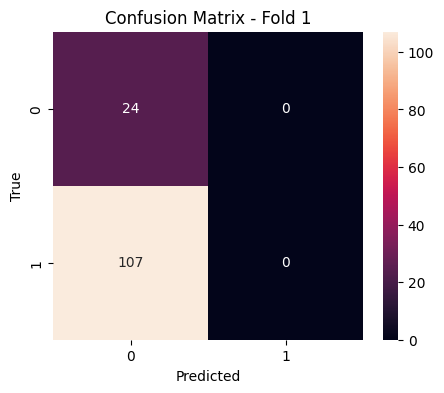

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



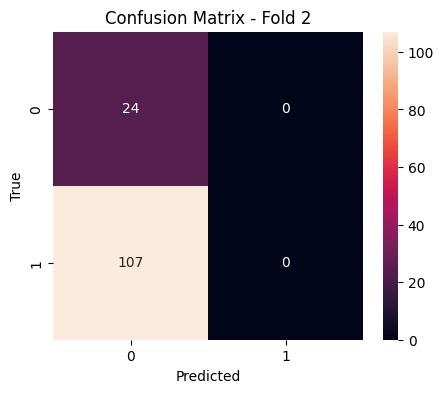

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 21.37%
  Precision = 1.0
  Recall = 0.037383177570093455
  F1-Score = 0.07207207207207207
  Confusion Matrix:
[[ 24   0]
 [103   4]]



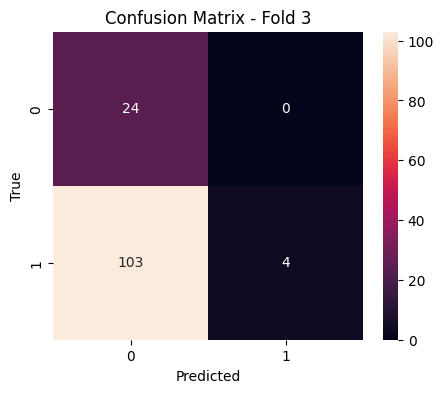

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



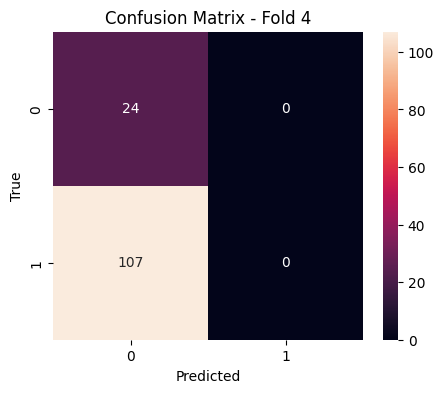

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 19.08%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 25   0]
 [106   0]]



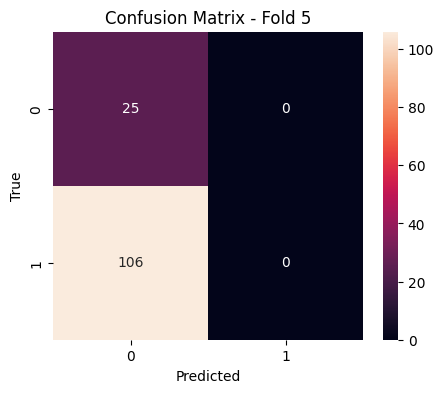

Average TP: 0.8
Average TN: 24.2
Average FP: 0.0
Average FN: 106.0
Average Accuracy: 19.08%
Average Precision: 1.0
Average Recall: 0.007490636704119851
Average F1-Score: 0.014869888475836432



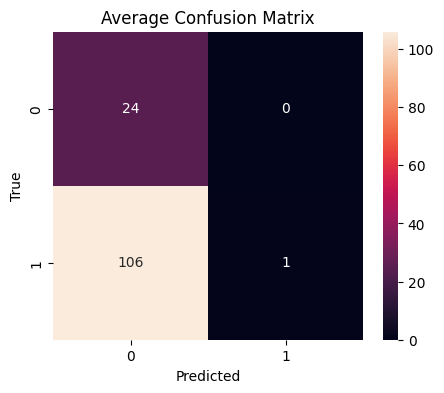

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.00000001, b=0.1, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


### alpha = 0,0000001

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



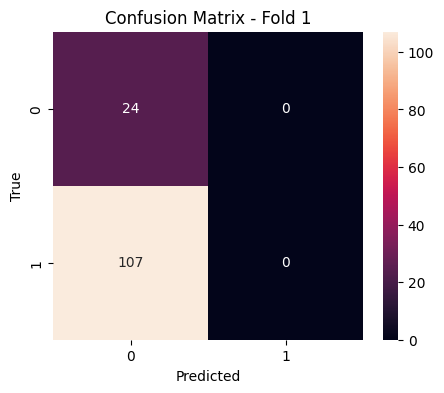

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



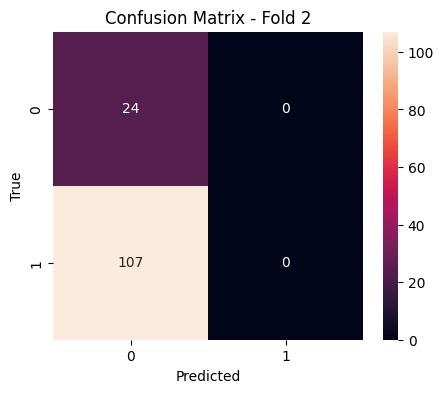

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 21.37%
  Precision = 1.0
  Recall = 0.037383177570093455
  F1-Score = 0.07207207207207207
  Confusion Matrix:
[[ 24   0]
 [103   4]]



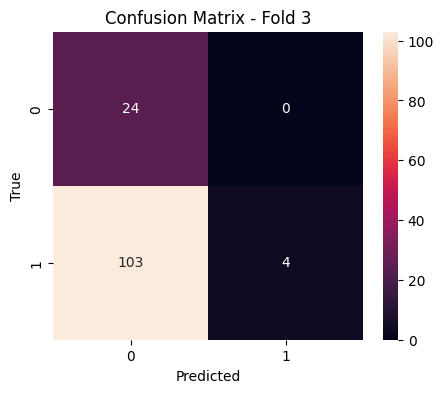

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



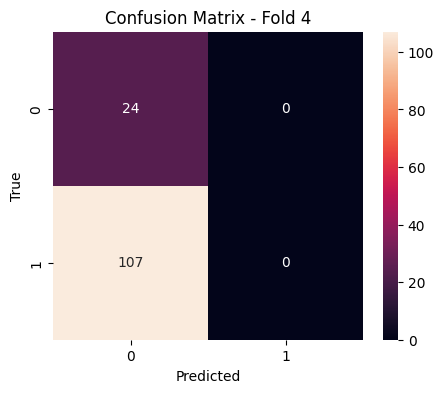

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 19.08%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 25   0]
 [106   0]]



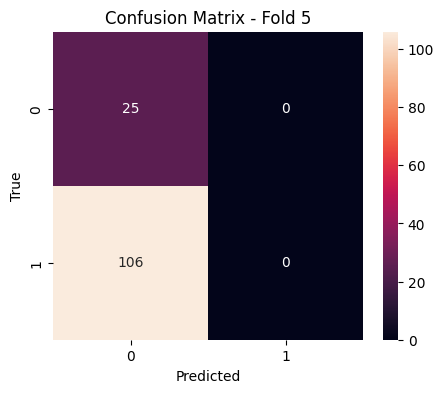

Average TP: 0.8
Average TN: 24.2
Average FP: 0.0
Average FN: 106.0
Average Accuracy: 19.08%
Average Precision: 1.0
Average Recall: 0.007490636704119851
Average F1-Score: 0.014869888475836432



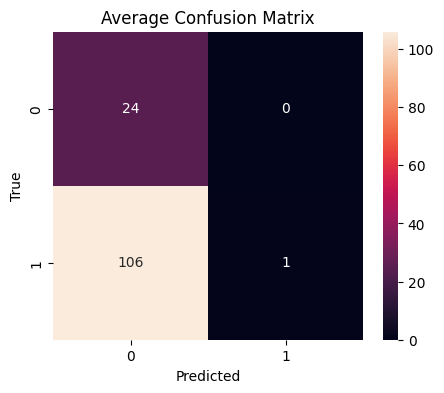

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.0000001, b=0.1, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


### alpha = 0,000001

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



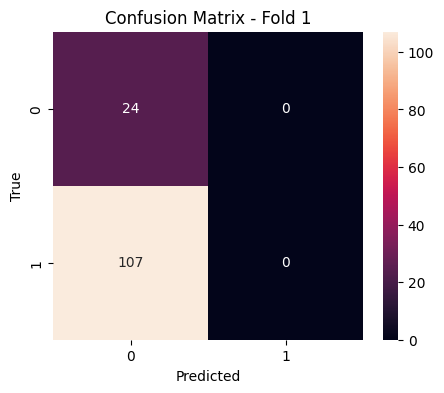

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



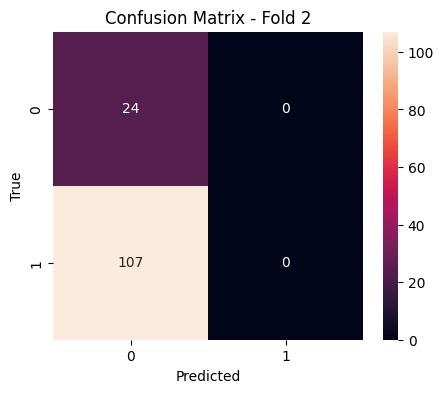

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 21.37%
  Precision = 1.0
  Recall = 0.037383177570093455
  F1-Score = 0.07207207207207207
  Confusion Matrix:
[[ 24   0]
 [103   4]]



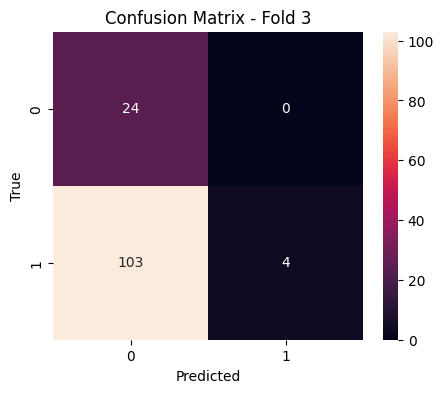

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



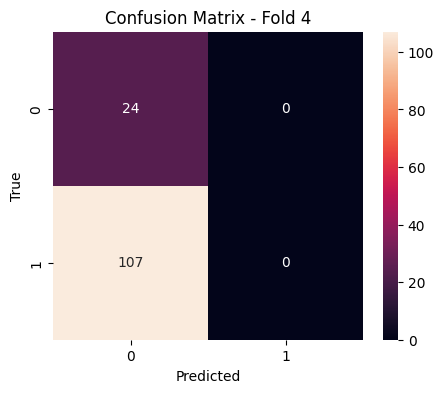

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 19.08%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 25   0]
 [106   0]]



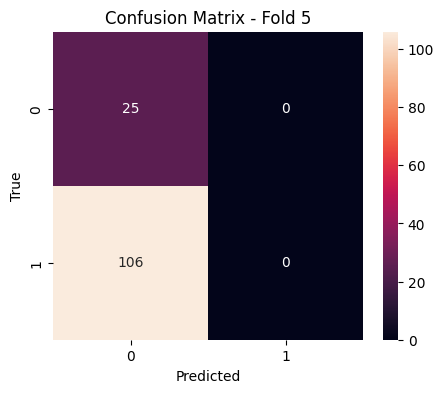

Average TP: 0.8
Average TN: 24.2
Average FP: 0.0
Average FN: 106.0
Average Accuracy: 19.08%
Average Precision: 1.0
Average Recall: 0.007490636704119851
Average F1-Score: 0.014869888475836432



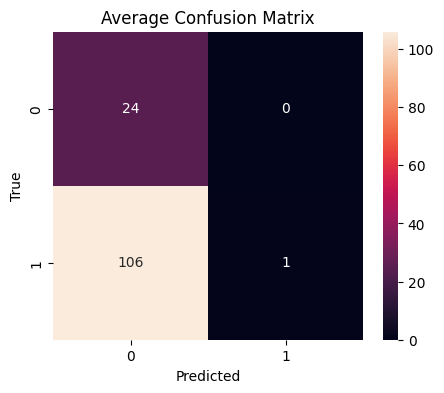

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.000001, b=0.1, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


### alpha = 0,00001

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



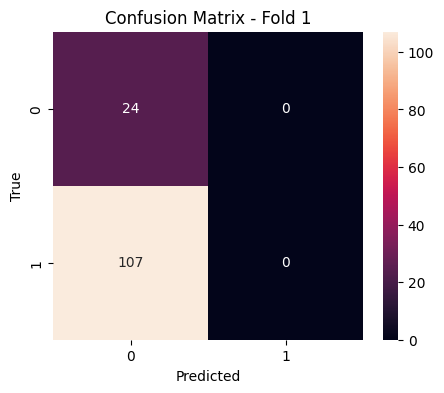

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



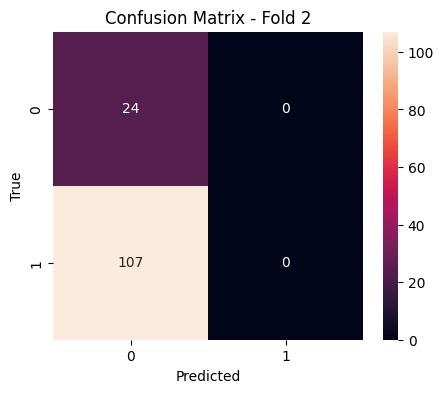

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 21.37%
  Precision = 1.0
  Recall = 0.037383177570093455
  F1-Score = 0.07207207207207207
  Confusion Matrix:
[[ 24   0]
 [103   4]]



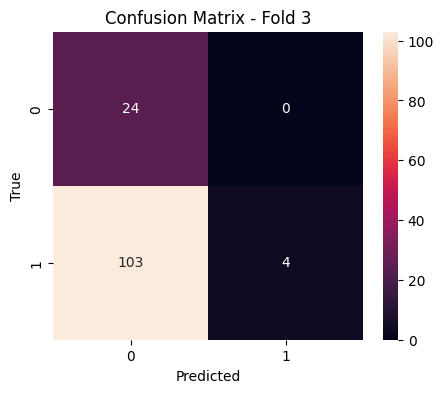

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



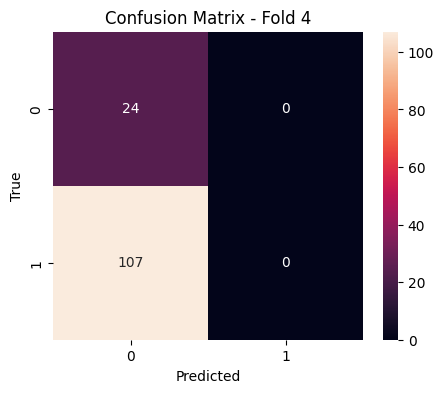

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 19.08%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 25   0]
 [106   0]]



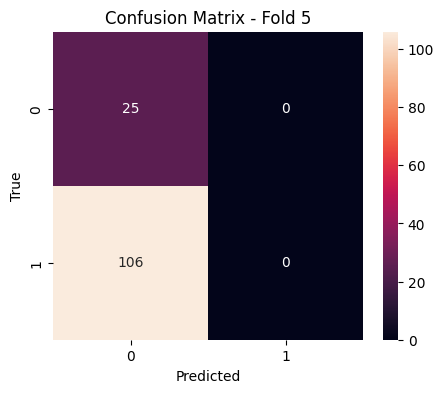

Average TP: 0.8
Average TN: 24.2
Average FP: 0.0
Average FN: 106.0
Average Accuracy: 19.08%
Average Precision: 1.0
Average Recall: 0.007490636704119851
Average F1-Score: 0.014869888475836432



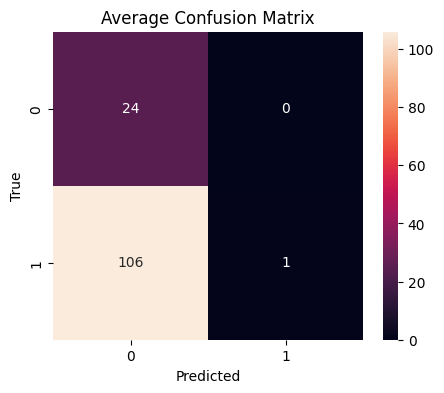

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.00001, b=0.1, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


### alpha = 0,0001

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



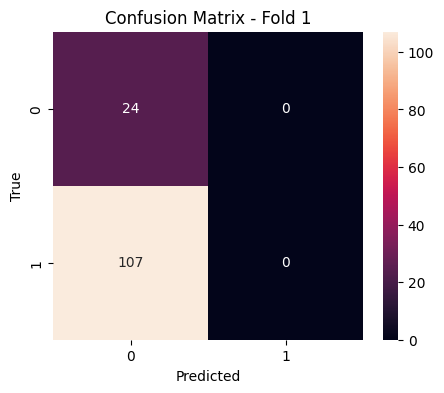

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



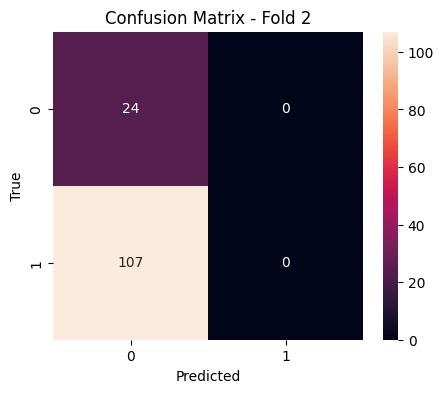

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 21.37%
  Precision = 1.0
  Recall = 0.037383177570093455
  F1-Score = 0.07207207207207207
  Confusion Matrix:
[[ 24   0]
 [103   4]]



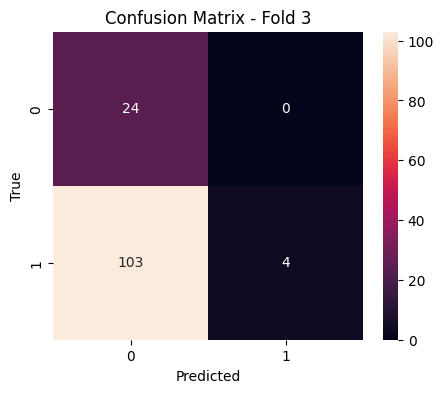

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 19.08%
  Precision = 1.0
  Recall = 0.009345794392523364
  F1-Score = 0.018518518518518517
  Confusion Matrix:
[[ 24   0]
 [106   1]]



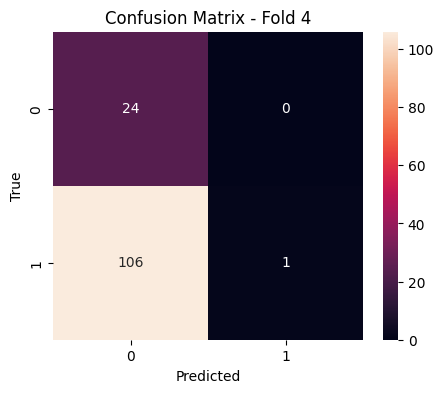

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 19.08%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 25   0]
 [106   0]]



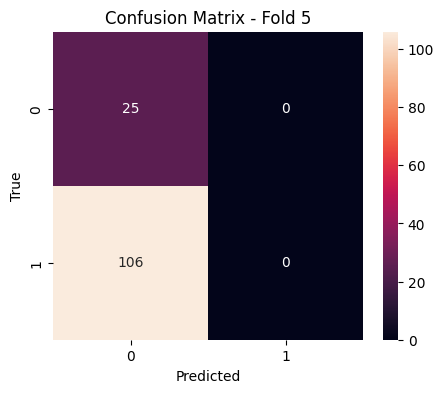

Average TP: 1.0
Average TN: 24.2
Average FP: 0.0
Average FN: 105.8
Average Accuracy: 19.24%
Average Precision: 1.0
Average Recall: 0.009363295880149813
Average F1-Score: 0.01855287569573284



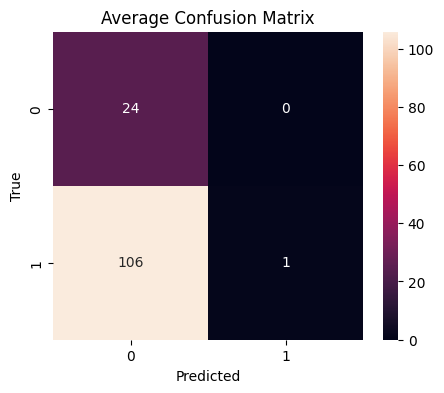

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.0001, b=0.1, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

### alpha = 0,001

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



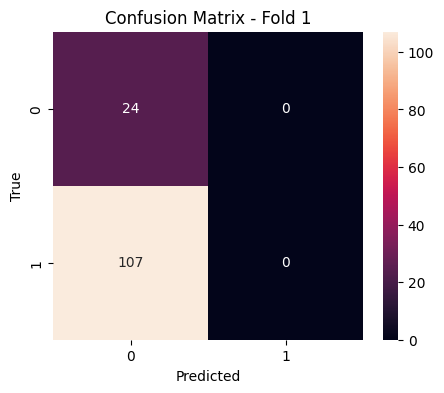

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 18.32%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 24   0]
 [107   0]]



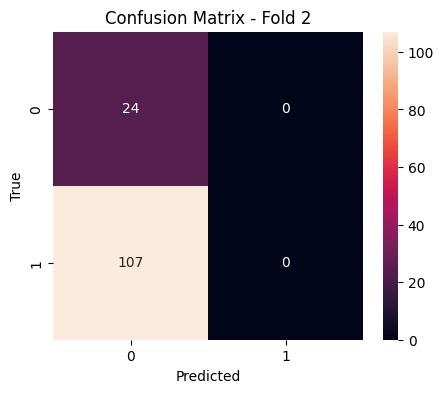

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 35.88%
  Precision = 1.0
  Recall = 0.21495327102803738
  F1-Score = 0.35384615384615387
  Confusion Matrix:
[[24  0]
 [84 23]]



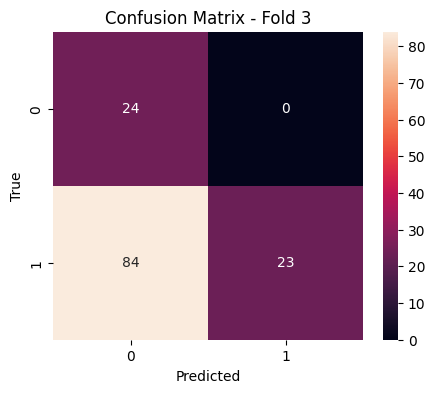

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 82.44%
  Precision = 0.823076923076923
  Recall = 1.0
  F1-Score = 0.9029535864978903
  Confusion Matrix:
[[  1  23]
 [  0 107]]



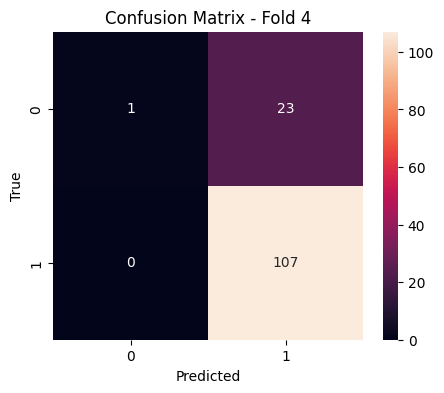

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 19.08%
  Precision = 0
  Recall = 0.0
  F1-Score = 0
  Confusion Matrix:
[[ 25   0]
 [106   0]]



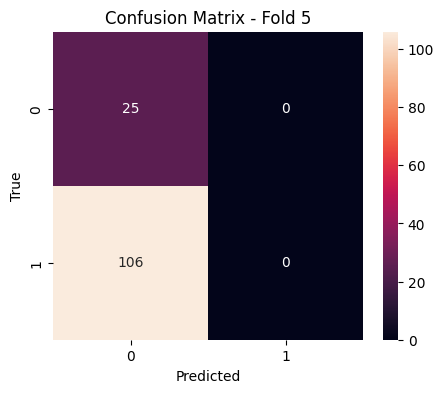

Average TP: 26.0
Average TN: 19.6
Average FP: 4.6
Average FN: 80.8
Average Accuracy: 34.81%
Average Precision: 0.8496732026143791
Average Recall: 0.24344569288389514
Average F1-Score: 0.3784570596797671



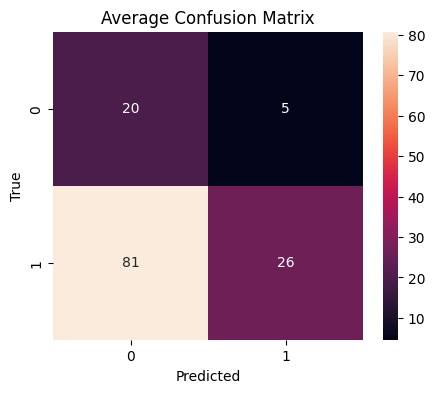

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.001, b=0.1, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

### alpha = 0,01

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 81.68%
  Precision = 0.816793893129771
  Recall = 1.0
  F1-Score = 0.8991596638655461
  Confusion Matrix:
[[  0  24]
 [  0 107]]



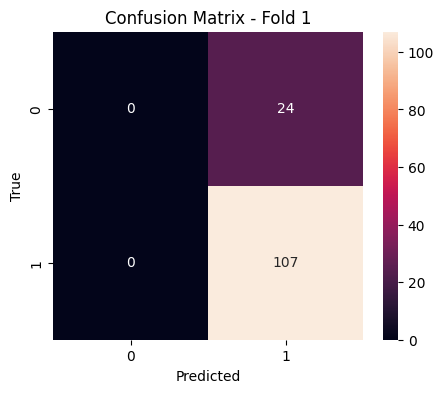

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 81.68%
  Precision = 0.816793893129771
  Recall = 1.0
  F1-Score = 0.8991596638655461
  Confusion Matrix:
[[  0  24]
 [  0 107]]



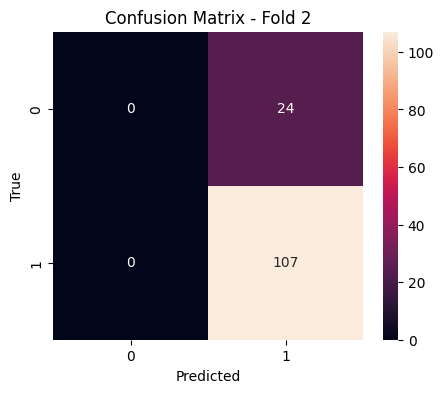

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 94.66%
  Precision = 0.9464285714285714
  Recall = 0.9906542056074766
  F1-Score = 0.9680365296803651
  Confusion Matrix:
[[ 18   6]
 [  1 106]]



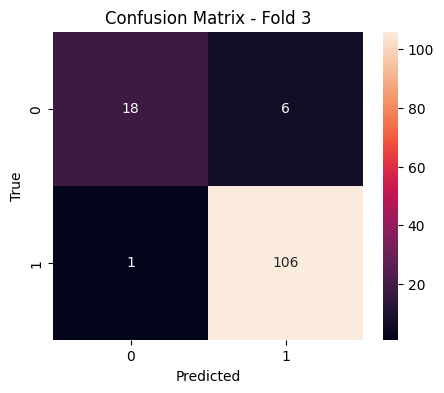

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 81.68%
  Precision = 0.816793893129771
  Recall = 1.0
  F1-Score = 0.8991596638655461
  Confusion Matrix:
[[  0  24]
 [  0 107]]



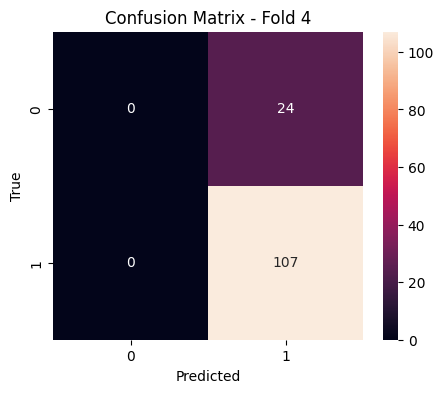

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 80.92%
  Precision = 0.8091603053435115
  Recall = 1.0
  F1-Score = 0.8945147679324894
  Confusion Matrix:
[[  0  25]
 [  0 106]]



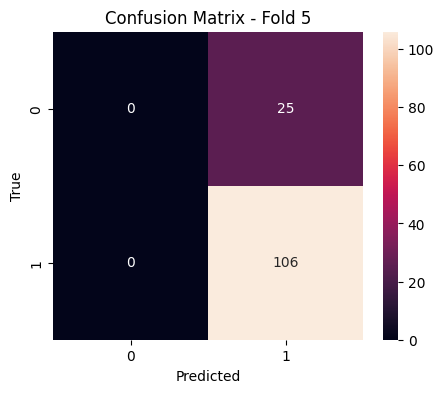

Average TP: 106.6
Average TN: 3.6
Average FP: 20.6
Average FN: 0.2
Average Accuracy: 84.12%
Average Precision: 0.8380503144654088
Average Recall: 0.99812734082397
Average F1-Score: 0.9111111111111111



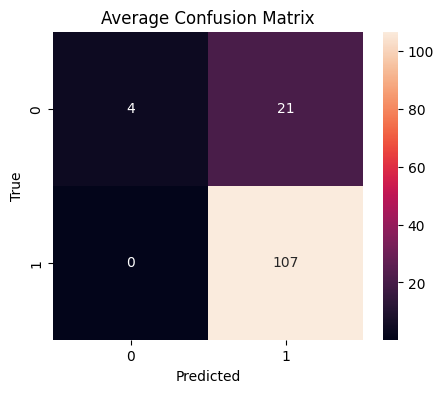

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.01, b=0.1, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


### alpha = 0,1

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 89.31%
  Precision = 0.918918918918919
  Recall = 0.9532710280373832
  F1-Score = 0.9357798165137614
  Confusion Matrix:
[[ 15   9]
 [  5 102]]



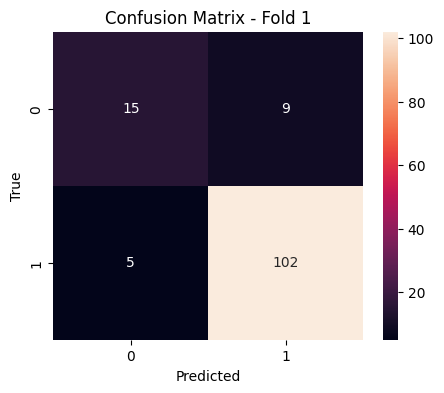

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



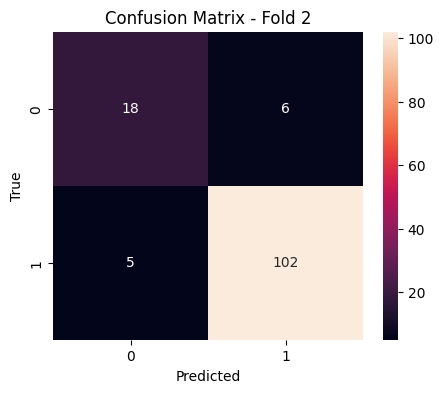

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 94.66%
  Precision = 0.9464285714285714
  Recall = 0.9906542056074766
  F1-Score = 0.9680365296803651
  Confusion Matrix:
[[ 18   6]
 [  1 106]]



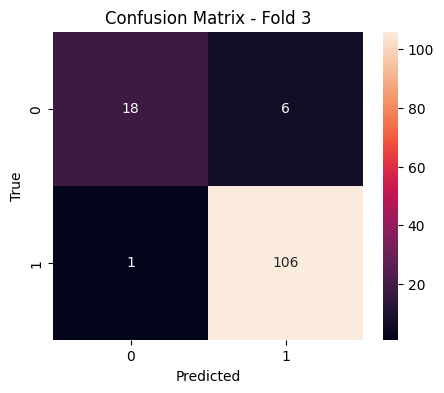

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.84%
  Precision = 0.9279279279279279
  Recall = 0.9626168224299065
  F1-Score = 0.944954128440367
  Confusion Matrix:
[[ 16   8]
 [  4 103]]



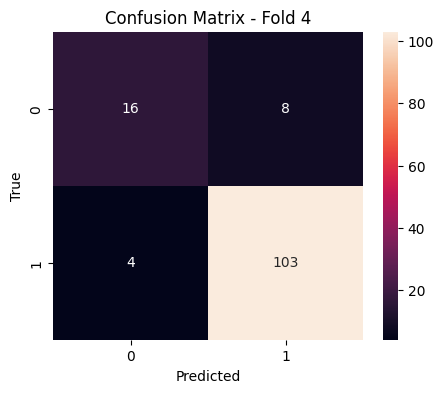

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 90.84%
  Precision = 0.9607843137254902
  Recall = 0.9245283018867925
  F1-Score = 0.9423076923076923
  Confusion Matrix:
[[21  4]
 [ 8 98]]



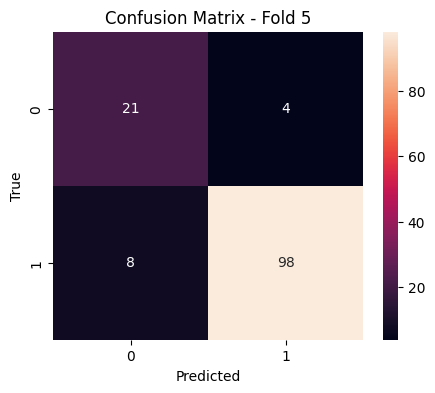

Average TP: 102.2
Average TN: 17.6
Average FP: 6.6
Average FN: 4.6
Average Accuracy: 91.45%
Average Precision: 0.9393382352941178
Average Recall: 0.9569288389513109
Average F1-Score: 0.9480519480519481



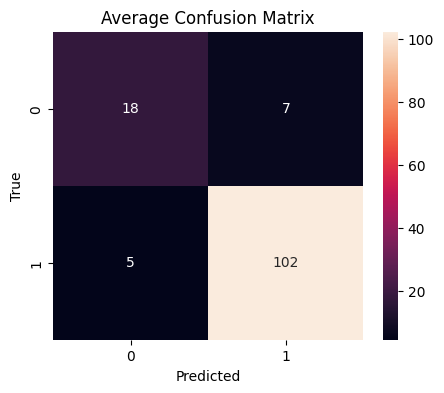

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.1, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


### alpha = 1

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 81.68%
  Precision = 0.816793893129771
  Recall = 1.0
  F1-Score = 0.8991596638655461
  Confusion Matrix:
[[  0  24]
 [  0 107]]



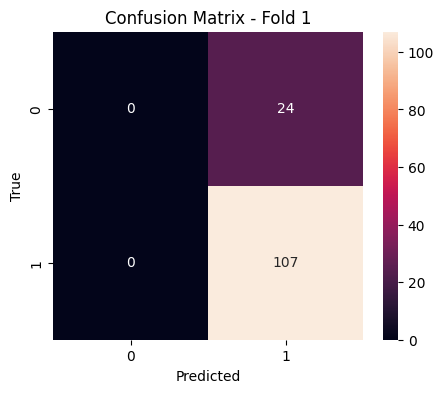

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 81.68%
  Precision = 0.816793893129771
  Recall = 1.0
  F1-Score = 0.8991596638655461
  Confusion Matrix:
[[  0  24]
 [  0 107]]



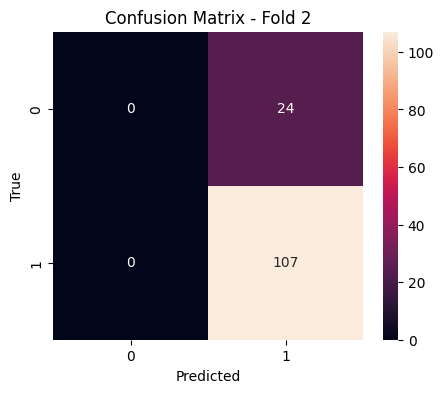

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 81.68%
  Precision = 0.816793893129771
  Recall = 1.0
  F1-Score = 0.8991596638655461
  Confusion Matrix:
[[  0  24]
 [  0 107]]



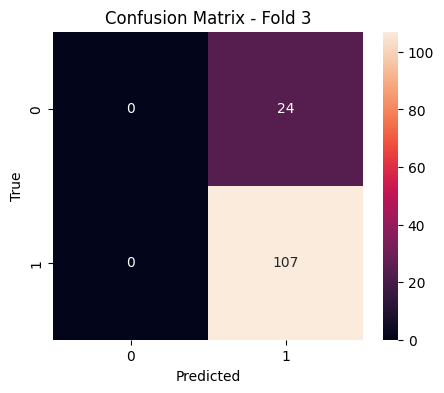

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 81.68%
  Precision = 0.816793893129771
  Recall = 1.0
  F1-Score = 0.8991596638655461
  Confusion Matrix:
[[  0  24]
 [  0 107]]



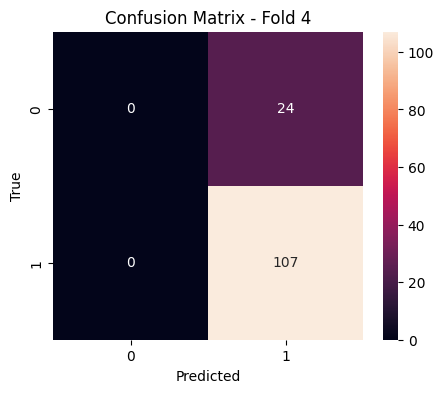

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 80.92%
  Precision = 0.8091603053435115
  Recall = 1.0
  F1-Score = 0.8945147679324894
  Confusion Matrix:
[[  0  25]
 [  0 106]]



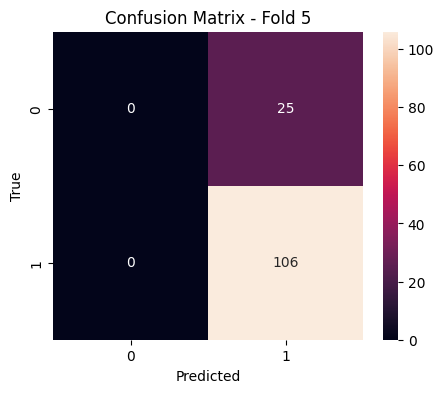

Average TP: 106.8
Average TN: 0.0
Average FP: 24.2
Average FN: 0.0
Average Accuracy: 81.53%
Average Precision: 0.815267175572519
Average Recall: 1.0
Average F1-Score: 0.898233809924306



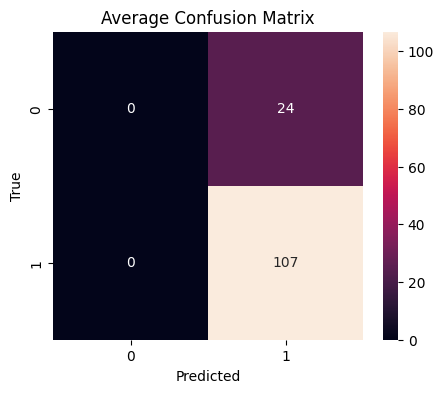

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=1, b=0.1, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

## Pengujian dec Alpha


### dec alpha = 0,000000001

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



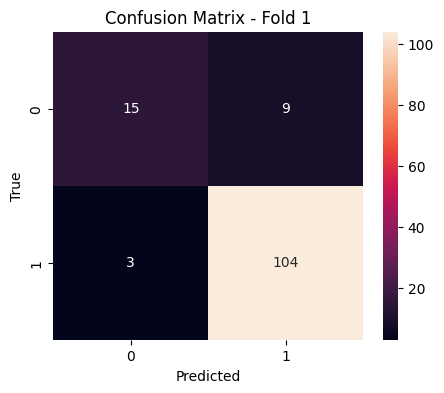

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



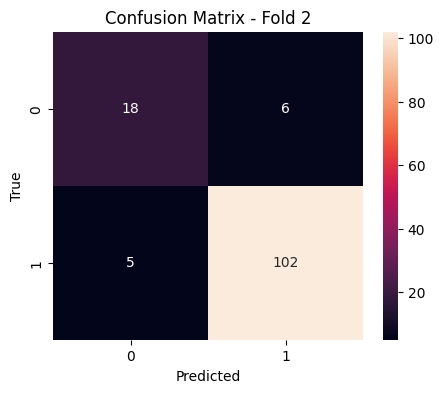

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



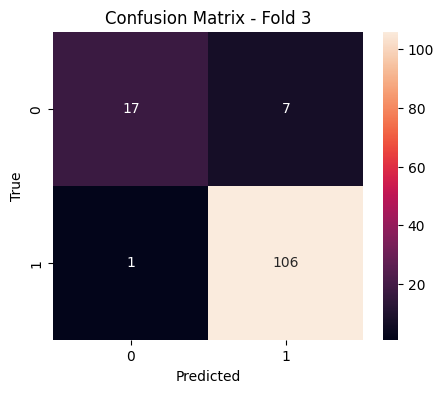

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.08%
  Precision = 0.9272727272727272
  Recall = 0.9532710280373832
  F1-Score = 0.9400921658986175
  Confusion Matrix:
[[ 16   8]
 [  5 102]]



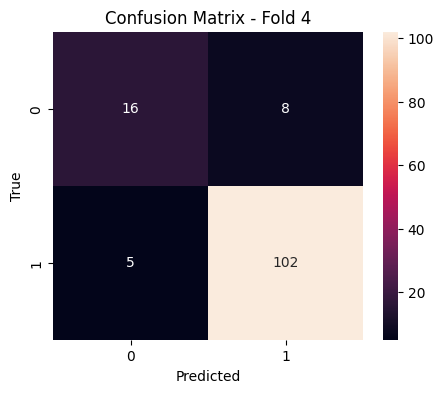

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 90.84%
  Precision = 0.9607843137254902
  Recall = 0.9245283018867925
  F1-Score = 0.9423076923076923
  Confusion Matrix:
[[21  4]
 [ 8 98]]



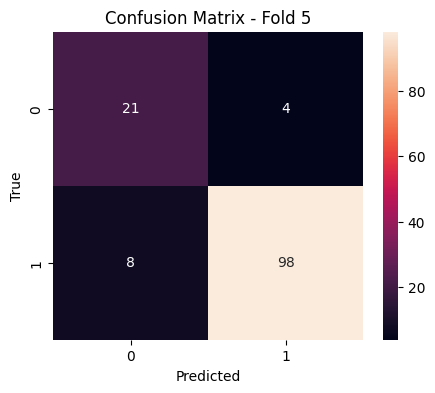

Average TP: 102.4
Average TN: 17.4
Average FP: 6.8
Average FN: 4.4
Average Accuracy: 91.45%
Average Precision: 0.9377289377289377
Average Recall: 0.9588014981273407
Average F1-Score: 0.9481481481481481



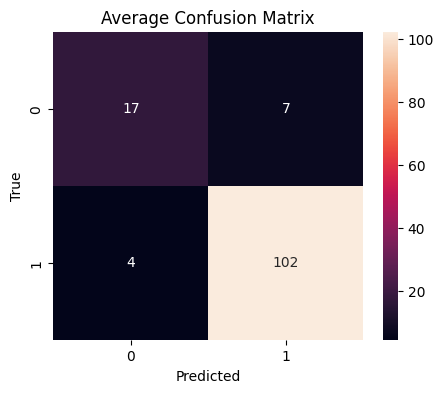

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.000000001, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


### dec alpha = 0,00000001

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



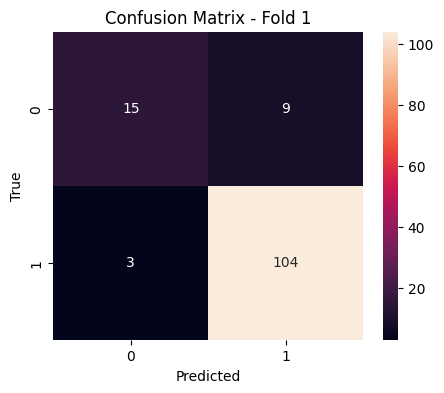

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



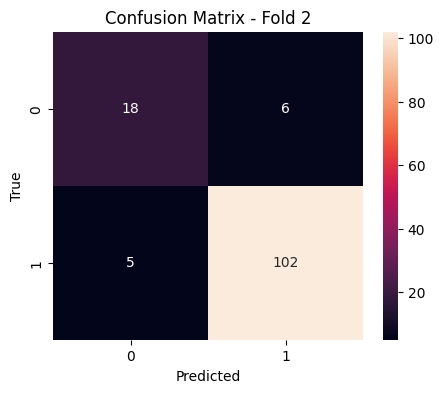

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



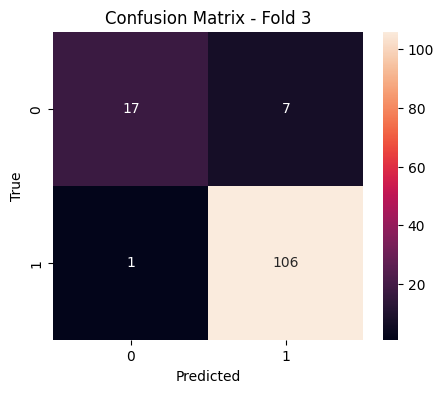

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.08%
  Precision = 0.9272727272727272
  Recall = 0.9532710280373832
  F1-Score = 0.9400921658986175
  Confusion Matrix:
[[ 16   8]
 [  5 102]]



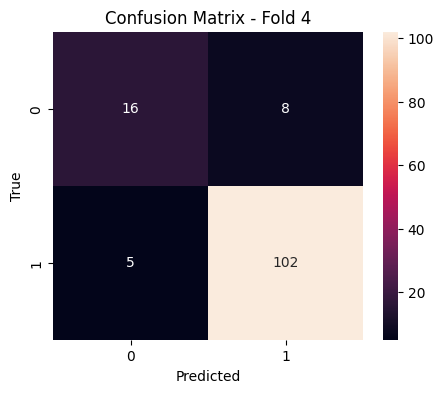

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 90.84%
  Precision = 0.9607843137254902
  Recall = 0.9245283018867925
  F1-Score = 0.9423076923076923
  Confusion Matrix:
[[21  4]
 [ 8 98]]



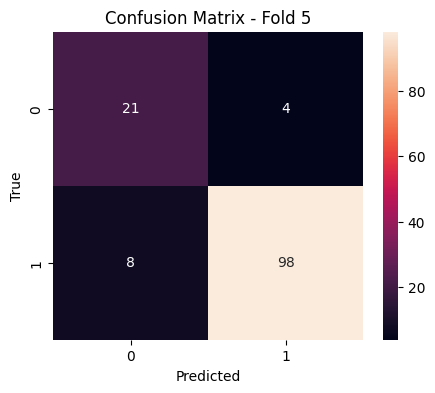

Average TP: 102.4
Average TN: 17.4
Average FP: 6.8
Average FN: 4.4
Average Accuracy: 91.45%
Average Precision: 0.9377289377289377
Average Recall: 0.9588014981273407
Average F1-Score: 0.9481481481481481



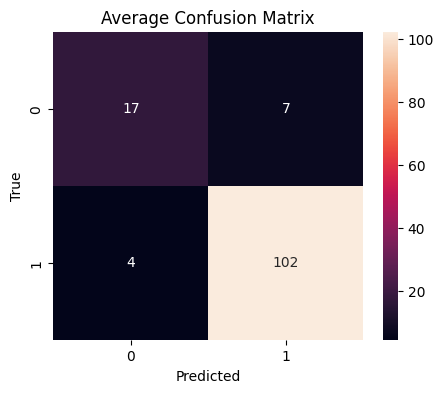

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.00000001, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


### dec alpha = 0,0000001

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



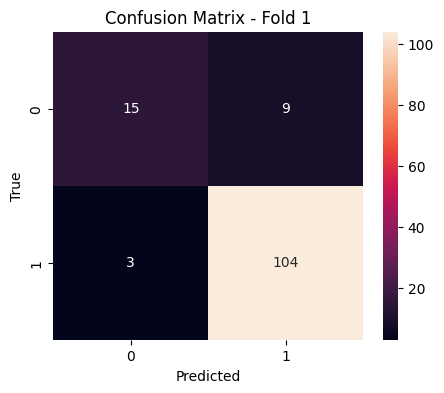

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



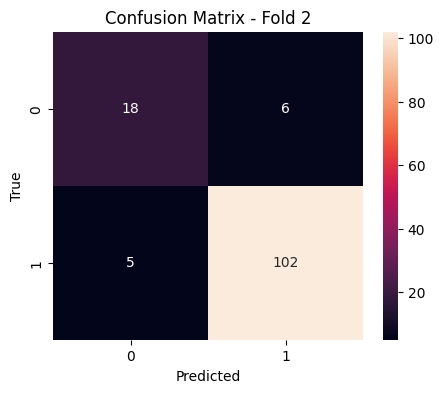

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



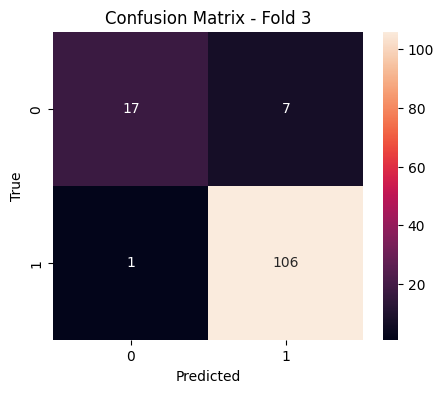

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.08%
  Precision = 0.9272727272727272
  Recall = 0.9532710280373832
  F1-Score = 0.9400921658986175
  Confusion Matrix:
[[ 16   8]
 [  5 102]]



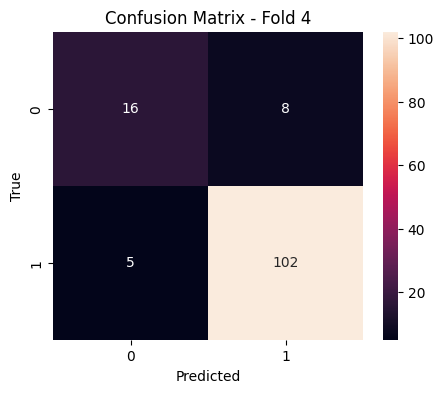

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 90.84%
  Precision = 0.9607843137254902
  Recall = 0.9245283018867925
  F1-Score = 0.9423076923076923
  Confusion Matrix:
[[21  4]
 [ 8 98]]



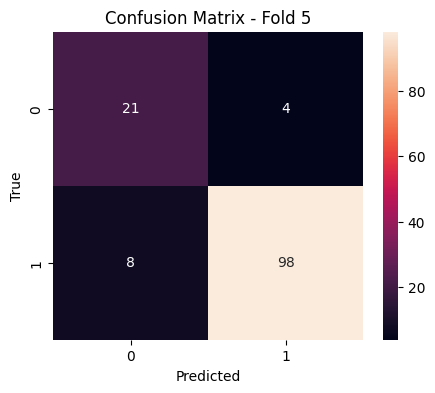

Average TP: 102.4
Average TN: 17.4
Average FP: 6.8
Average FN: 4.4
Average Accuracy: 91.45%
Average Precision: 0.9377289377289377
Average Recall: 0.9588014981273407
Average F1-Score: 0.9481481481481481



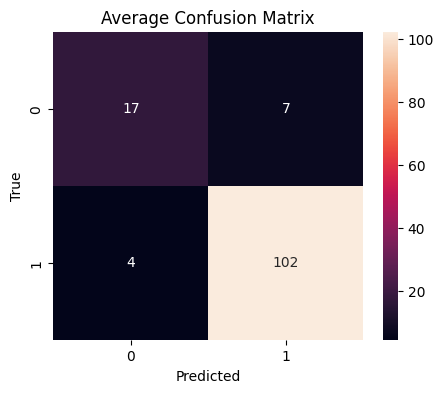

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.0000001, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


### dec alpha = 0,000001

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



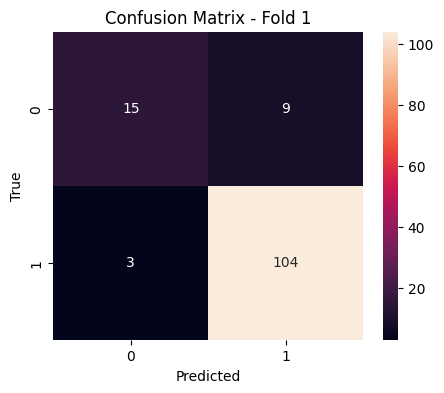

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



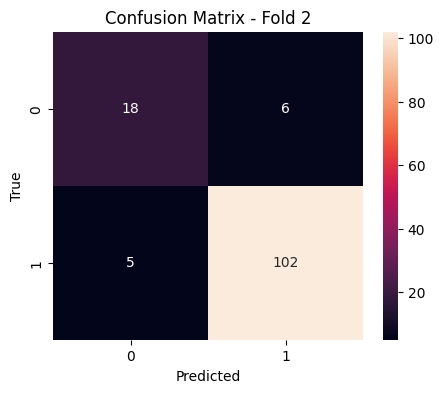

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



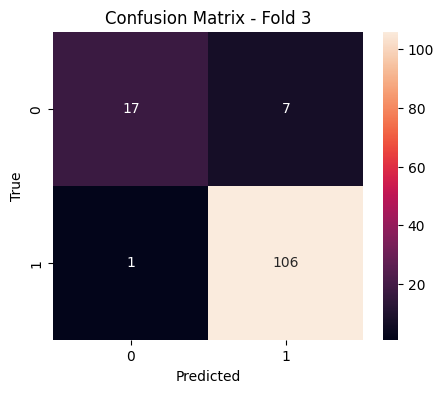

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.08%
  Precision = 0.9272727272727272
  Recall = 0.9532710280373832
  F1-Score = 0.9400921658986175
  Confusion Matrix:
[[ 16   8]
 [  5 102]]



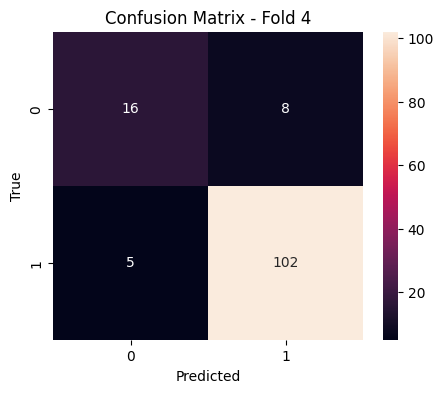

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 90.84%
  Precision = 0.9607843137254902
  Recall = 0.9245283018867925
  F1-Score = 0.9423076923076923
  Confusion Matrix:
[[21  4]
 [ 8 98]]



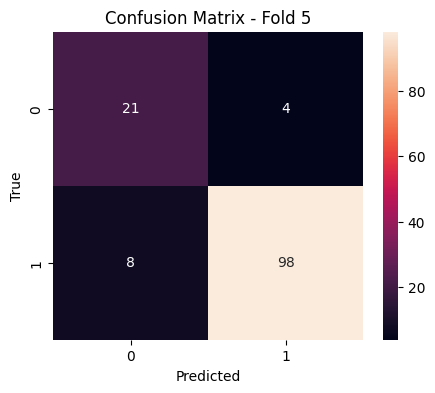

Average TP: 102.4
Average TN: 17.4
Average FP: 6.8
Average FN: 4.4
Average Accuracy: 91.45%
Average Precision: 0.9377289377289377
Average Recall: 0.9588014981273407
Average F1-Score: 0.9481481481481481



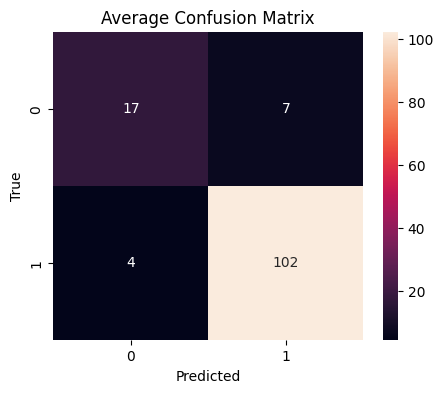

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.000001, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


### dec alpha = 0,00001

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



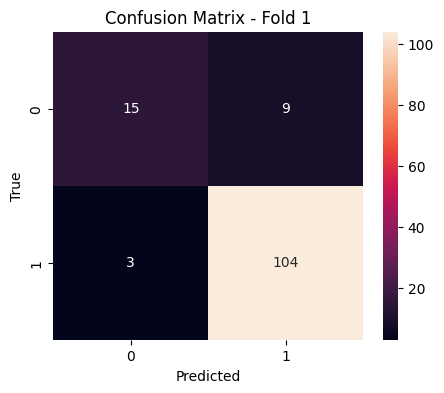

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



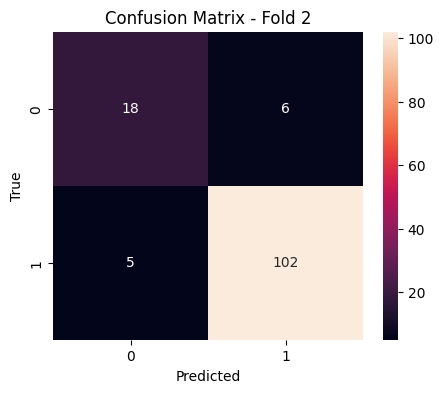

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



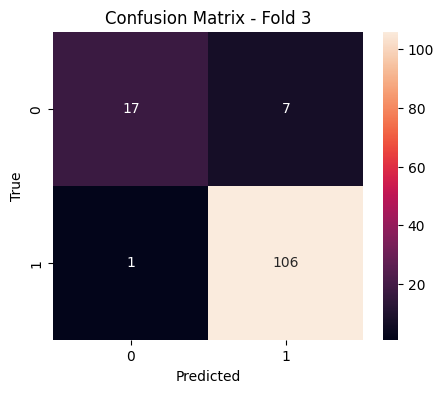

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.08%
  Precision = 0.9272727272727272
  Recall = 0.9532710280373832
  F1-Score = 0.9400921658986175
  Confusion Matrix:
[[ 16   8]
 [  5 102]]



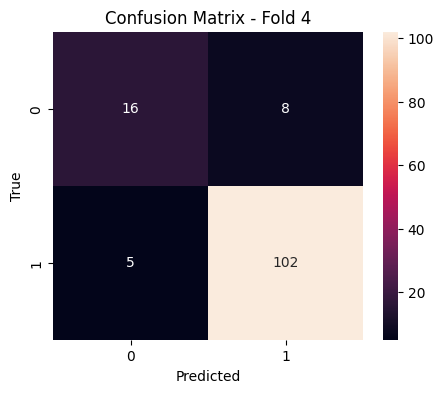

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 90.84%
  Precision = 0.9607843137254902
  Recall = 0.9245283018867925
  F1-Score = 0.9423076923076923
  Confusion Matrix:
[[21  4]
 [ 8 98]]



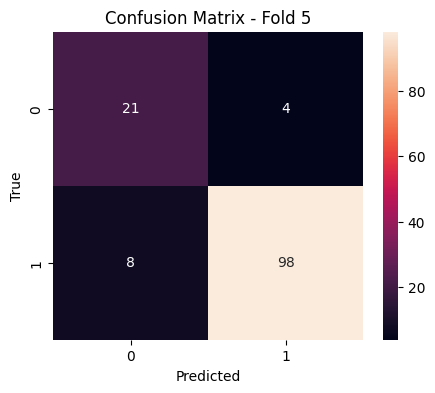

Average TP: 102.4
Average TN: 17.4
Average FP: 6.8
Average FN: 4.4
Average Accuracy: 91.45%
Average Precision: 0.9377289377289377
Average Recall: 0.9588014981273407
Average F1-Score: 0.9481481481481481



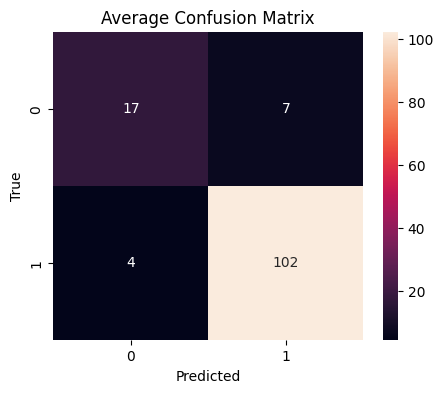

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.00001, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


### dec alpha = 0,0001

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



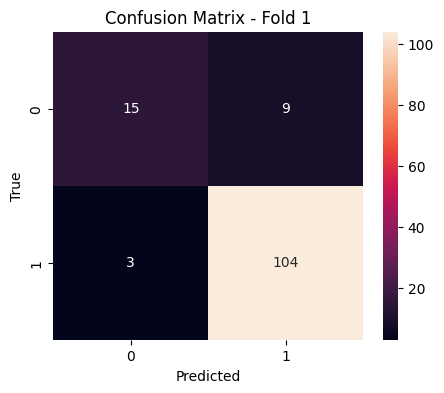

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



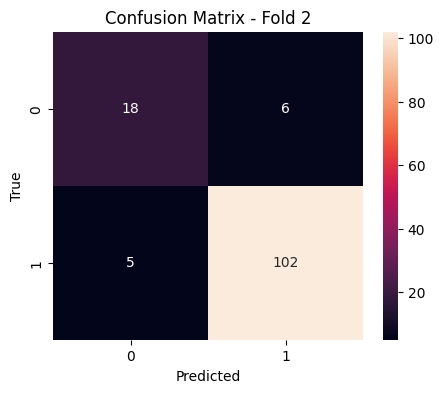

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



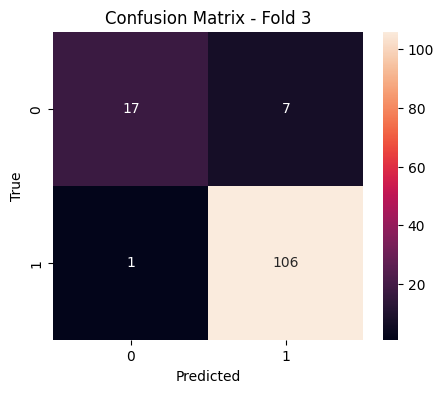

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.08%
  Precision = 0.9272727272727272
  Recall = 0.9532710280373832
  F1-Score = 0.9400921658986175
  Confusion Matrix:
[[ 16   8]
 [  5 102]]



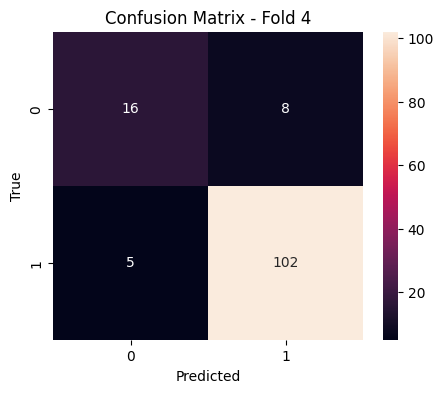

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 90.84%
  Precision = 0.9607843137254902
  Recall = 0.9245283018867925
  F1-Score = 0.9423076923076923
  Confusion Matrix:
[[21  4]
 [ 8 98]]



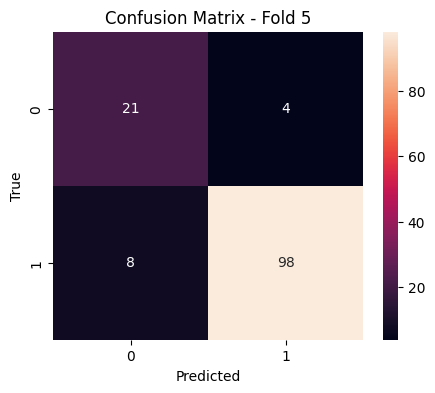

Average TP: 102.4
Average TN: 17.4
Average FP: 6.8
Average FN: 4.4
Average Accuracy: 91.45%
Average Precision: 0.9377289377289377
Average Recall: 0.9588014981273407
Average F1-Score: 0.9481481481481481



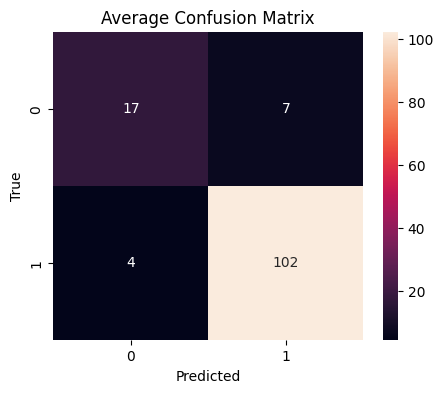

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.0001, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


### dec alpha = 0,001

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



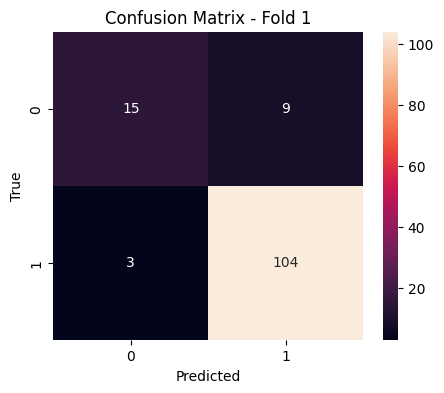

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



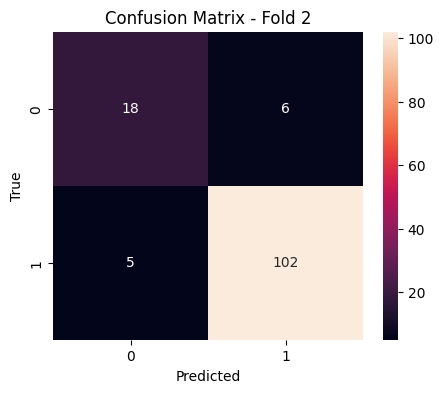

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



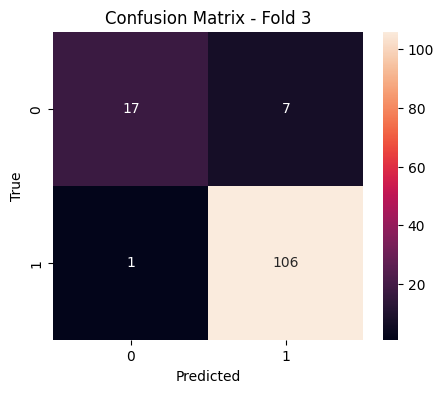

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.08%
  Precision = 0.9272727272727272
  Recall = 0.9532710280373832
  F1-Score = 0.9400921658986175
  Confusion Matrix:
[[ 16   8]
 [  5 102]]



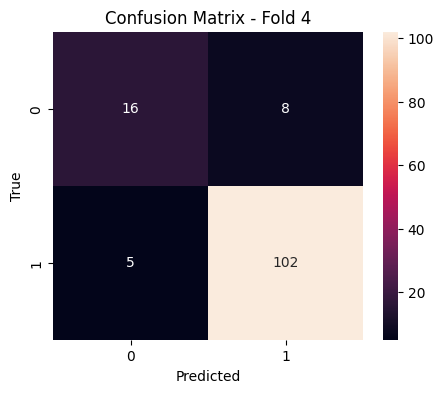

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 90.84%
  Precision = 0.9607843137254902
  Recall = 0.9245283018867925
  F1-Score = 0.9423076923076923
  Confusion Matrix:
[[21  4]
 [ 8 98]]



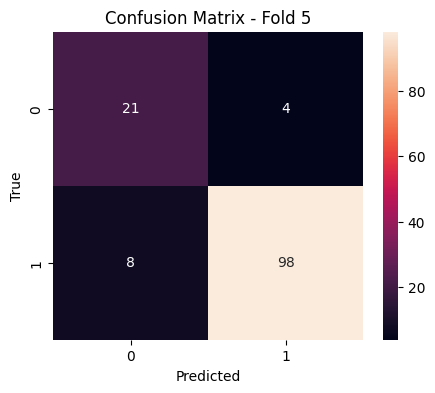

Average TP: 102.4
Average TN: 17.4
Average FP: 6.8
Average FN: 4.4
Average Accuracy: 91.45%
Average Precision: 0.9377289377289377
Average Recall: 0.9588014981273407
Average F1-Score: 0.9481481481481481



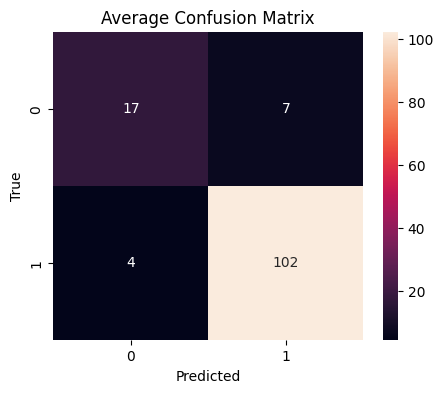

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.001, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


### dec alpha = 0,01

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



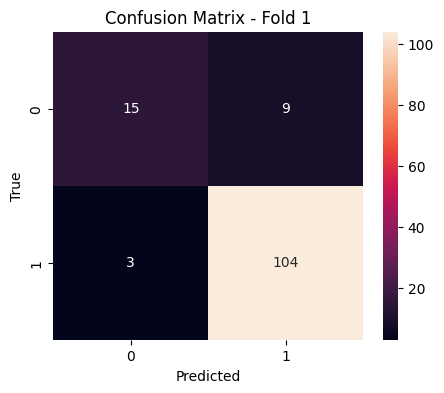

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



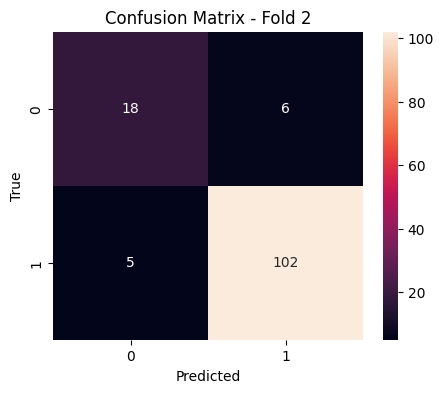

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



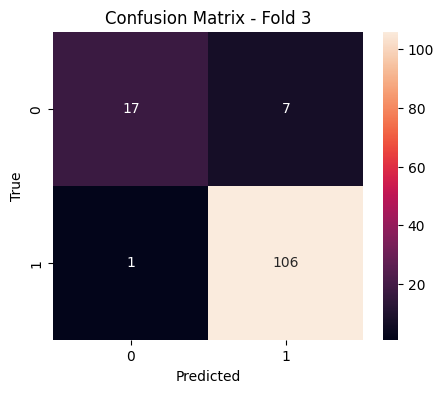

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.84%
  Precision = 0.9279279279279279
  Recall = 0.9626168224299065
  F1-Score = 0.944954128440367
  Confusion Matrix:
[[ 16   8]
 [  4 103]]



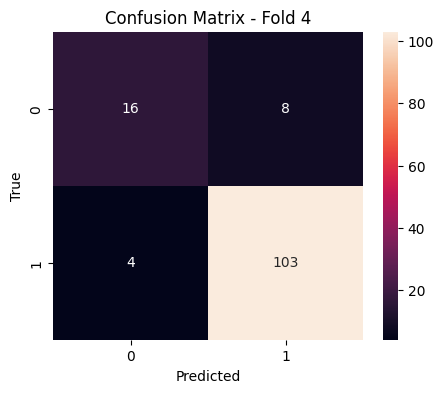

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 91.60%
  Precision = 0.9611650485436893
  Recall = 0.9339622641509434
  F1-Score = 0.9473684210526316
  Confusion Matrix:
[[21  4]
 [ 7 99]]



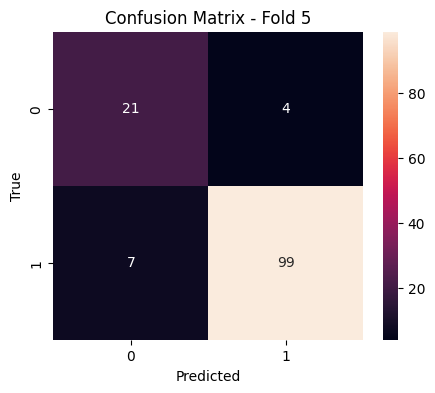

Average TP: 102.8
Average TN: 17.4
Average FP: 6.8
Average FN: 4.0
Average Accuracy: 91.76%
Average Precision: 0.9379562043795621
Average Recall: 0.9625468164794008
Average F1-Score: 0.9500924214417744



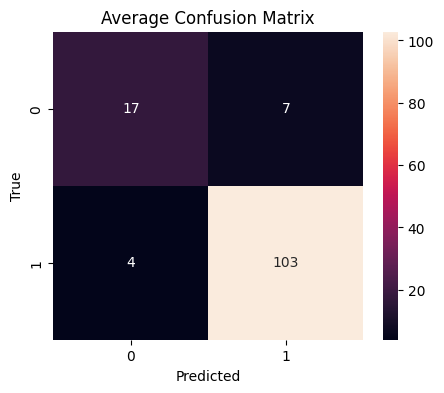

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.01, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


### dec Alpha = 0,1

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 89.31%
  Precision = 0.918918918918919
  Recall = 0.9532710280373832
  F1-Score = 0.9357798165137614
  Confusion Matrix:
[[ 15   9]
 [  5 102]]



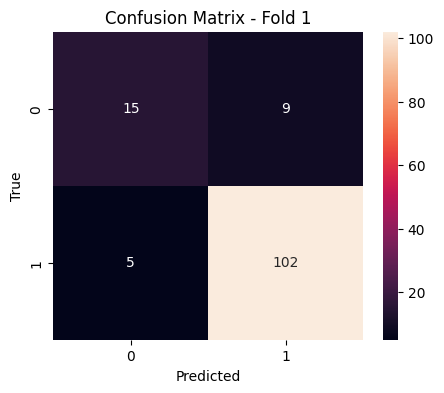

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



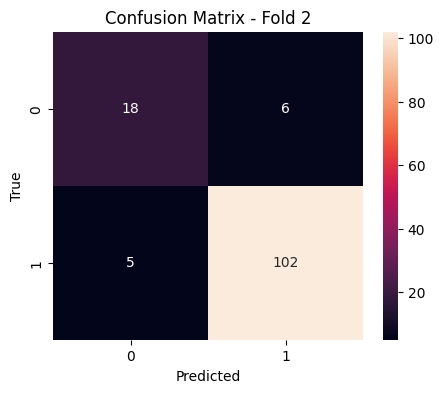

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 94.66%
  Precision = 0.9464285714285714
  Recall = 0.9906542056074766
  F1-Score = 0.9680365296803651
  Confusion Matrix:
[[ 18   6]
 [  1 106]]



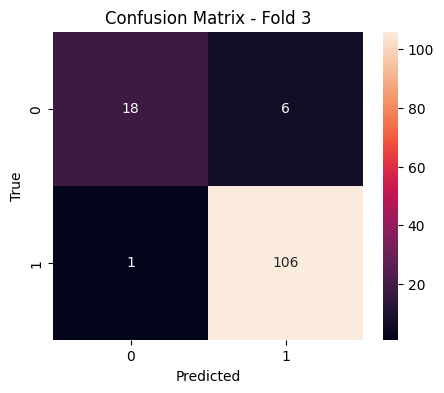

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.84%
  Precision = 0.9279279279279279
  Recall = 0.9626168224299065
  F1-Score = 0.944954128440367
  Confusion Matrix:
[[ 16   8]
 [  4 103]]



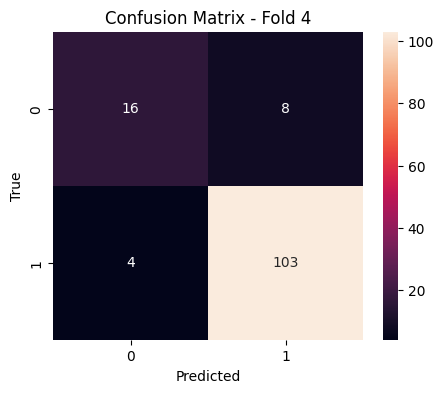

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 90.84%
  Precision = 0.9607843137254902
  Recall = 0.9245283018867925
  F1-Score = 0.9423076923076923
  Confusion Matrix:
[[21  4]
 [ 8 98]]



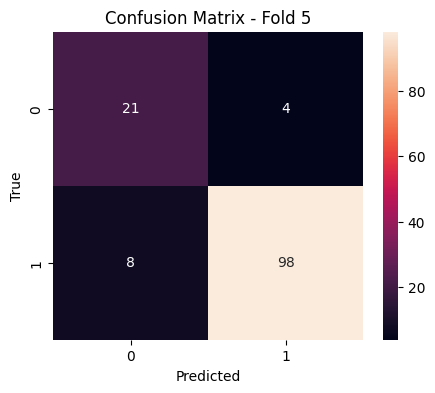

Average TP: 102.2
Average TN: 17.6
Average FP: 6.6
Average FN: 4.6
Average Accuracy: 91.45%
Average Precision: 0.9393382352941178
Average Recall: 0.9569288389513109
Average F1-Score: 0.9480519480519481



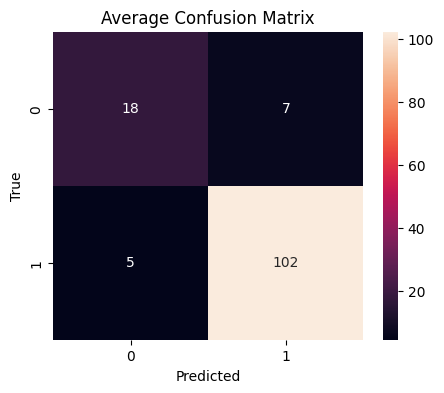

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.1, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


### dec alpha = 1

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 92.03539823008849
  Recall = 97.19626168224299
  F1-Score = 94.54545454545455
  Confusion Matrix:
[[ 15   9]
 [  3 104]]

Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



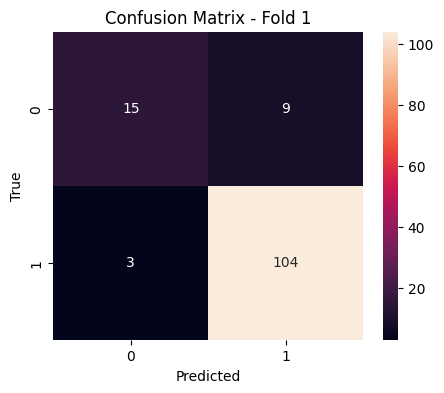

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 94.44444444444444
  Recall = 95.32710280373831
  F1-Score = 94.88372093023256
  Confusion Matrix:
[[ 18   6]
 [  5 102]]

Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



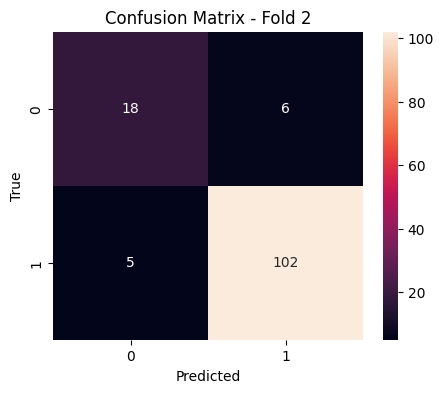

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 93.80530973451327
  Recall = 99.06542056074767
  F1-Score = 96.36363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]

Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



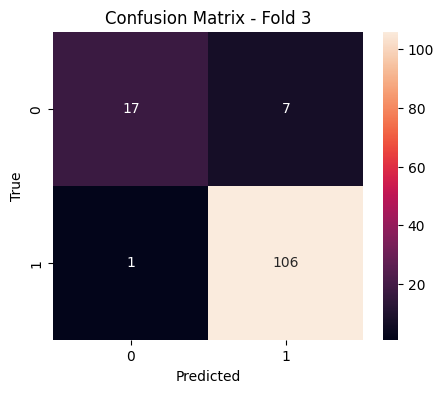

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.84%
  Precision = 94.39252336448598
  Recall = 94.39252336448598
  F1-Score = 94.39252336448598
  Confusion Matrix:
[[ 18   6]
 [  6 101]]

Fold 4:
  Accuracy = 90.84%
  Precision = 0.9439252336448598
  Recall = 0.9439252336448598
  F1-Score = 0.9439252336448598
  Confusion Matrix:
[[ 18   6]
 [  6 101]]



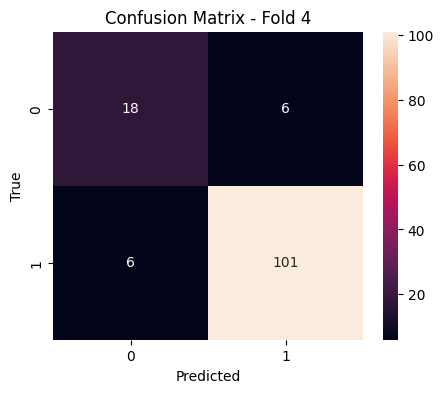

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 90.84%
  Precision = 96.07843137254902
  Recall = 92.45283018867924
  F1-Score = 94.23076923076923
  Confusion Matrix:
[[21  4]
 [ 8 98]]

Fold 5:
  Accuracy = 90.84%
  Precision = 0.9607843137254902
  Recall = 0.9245283018867925
  F1-Score = 0.9423076923076923
  Confusion Matrix:
[[21  4]
 [ 8 98]]



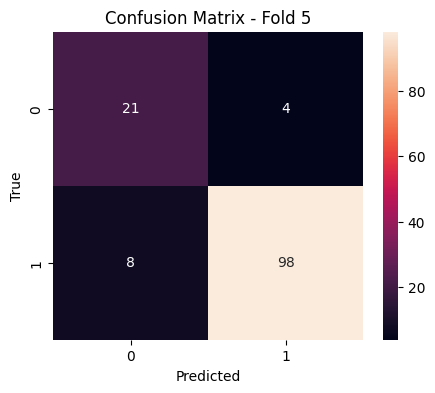

Average TP: 102.2
Average TN: 17.8
Average FP: 6.4
Average FN: 4.6
Average Accuracy: 91.60%
Average Precision: 0.9410681399631675
Average Recall: 0.9569288389513109
Average F1-Score: 0.9489322191272052



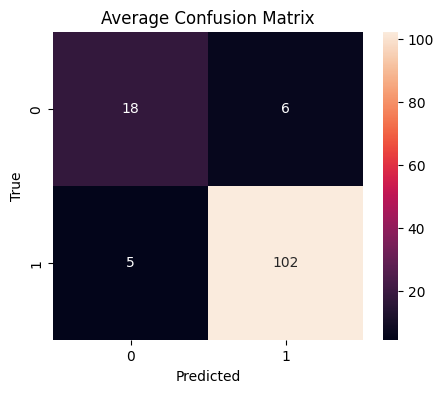

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=1, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision * 100}')
    print(f'  Recall = {recall * 100}')
    print(f'  F1-Score = {f1 * 100}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


## Pengujian Epoch

### Pengujian epoch = 1

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



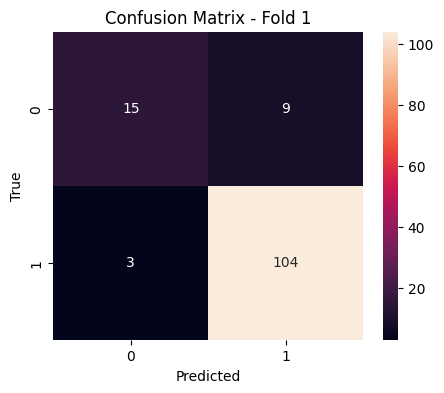

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



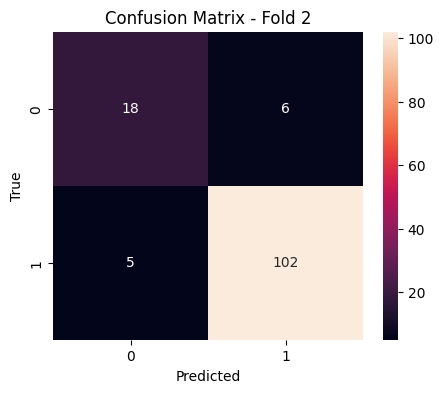

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



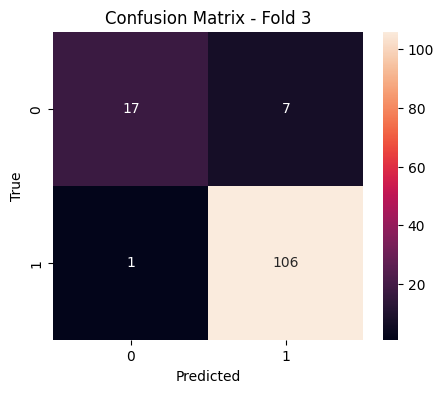

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.08%
  Precision = 0.9272727272727272
  Recall = 0.9532710280373832
  F1-Score = 0.9400921658986175
  Confusion Matrix:
[[ 16   8]
 [  5 102]]



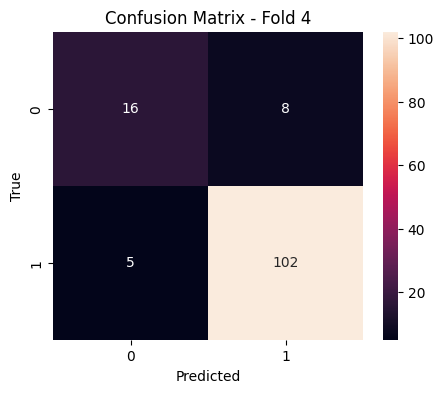

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 90.84%
  Precision = 0.9607843137254902
  Recall = 0.9245283018867925
  F1-Score = 0.9423076923076923
  Confusion Matrix:
[[21  4]
 [ 8 98]]



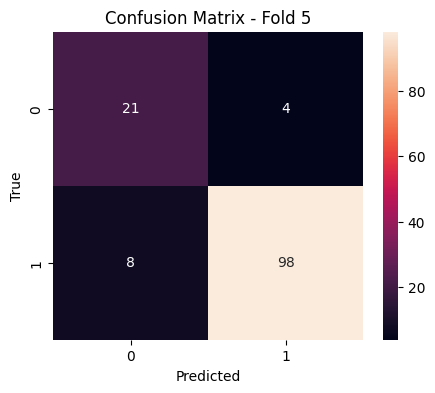

Average TP: 102.4
Average TN: 17.4
Average FP: 6.8
Average FN: 4.4
Average Accuracy: 91.45%
Average Precision: 0.9377289377289377
Average Recall: 0.9588014981273407
Average F1-Score: 0.9481481481481481



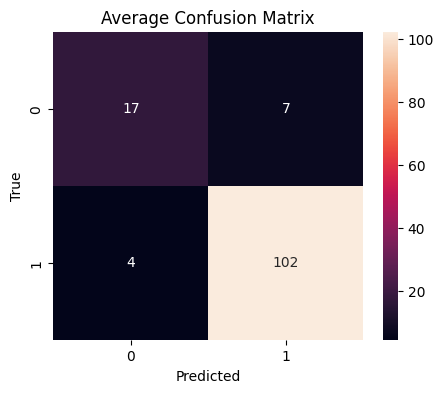

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.01, max_epoch=1)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

### Pengujian epoch = 3

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



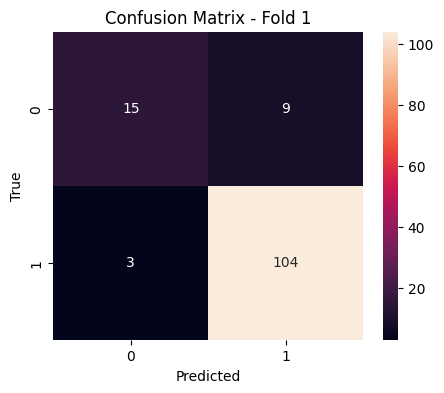

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



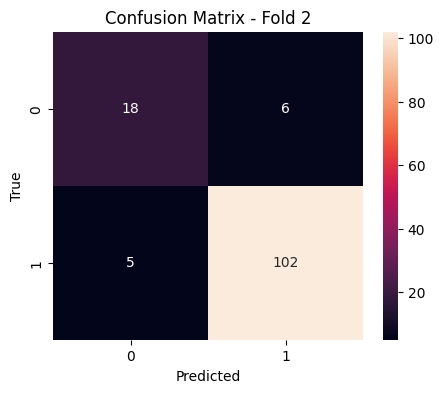

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



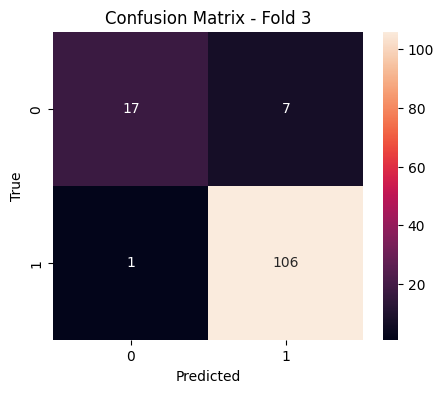

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.84%
  Precision = 0.9279279279279279
  Recall = 0.9626168224299065
  F1-Score = 0.944954128440367
  Confusion Matrix:
[[ 16   8]
 [  4 103]]



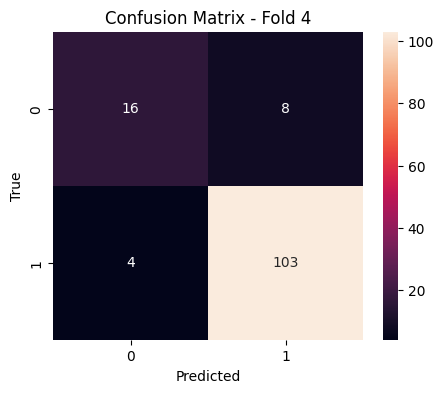

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 91.60%
  Precision = 0.9611650485436893
  Recall = 0.9339622641509434
  F1-Score = 0.9473684210526316
  Confusion Matrix:
[[21  4]
 [ 7 99]]



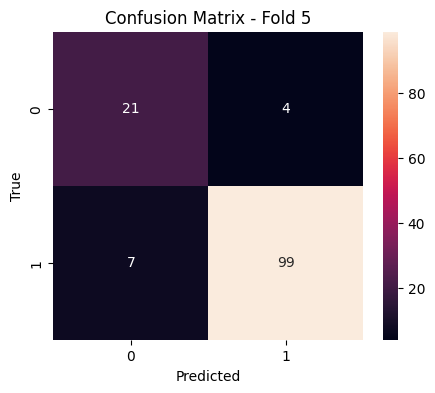

Average TP: 102.8
Average TN: 17.4
Average FP: 6.8
Average FN: 4.0
Average Accuracy: 91.76%
Average Precision: 0.9379562043795621
Average Recall: 0.9625468164794008
Average F1-Score: 0.9500924214417744



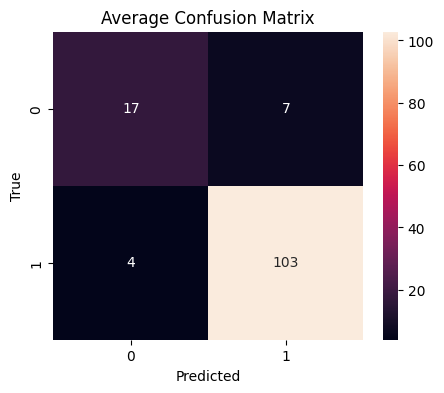

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.01, max_epoch=3)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


### Pengujian epoch = 5


<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



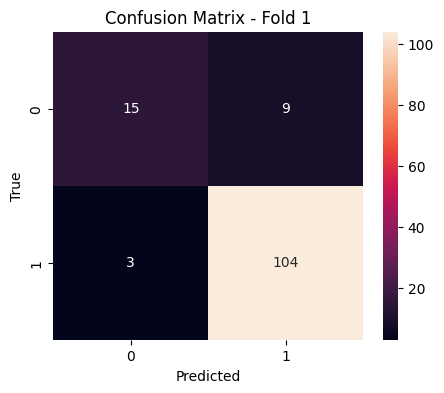

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



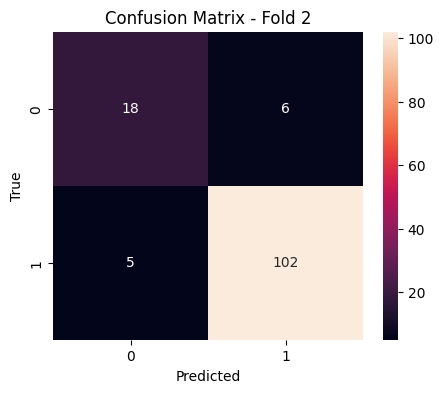

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



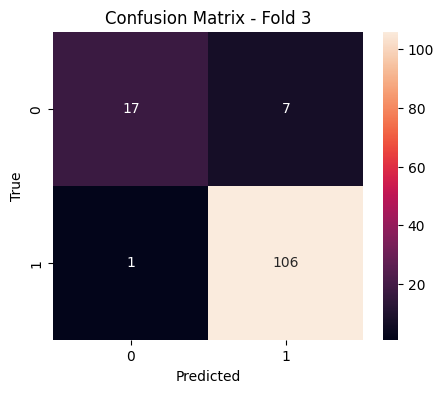

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.84%
  Precision = 0.9279279279279279
  Recall = 0.9626168224299065
  F1-Score = 0.944954128440367
  Confusion Matrix:
[[ 16   8]
 [  4 103]]



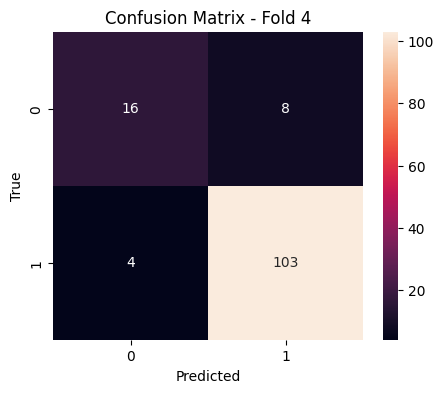

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 91.60%
  Precision = 0.9611650485436893
  Recall = 0.9339622641509434
  F1-Score = 0.9473684210526316
  Confusion Matrix:
[[21  4]
 [ 7 99]]



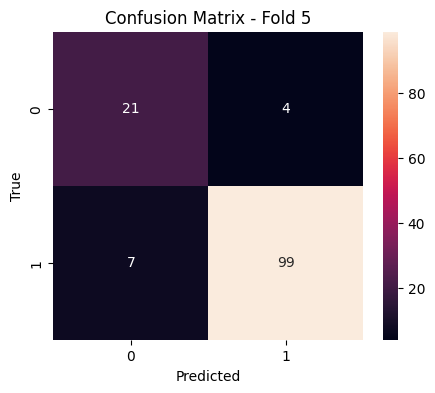

Average TP: 102.8
Average TN: 17.4
Average FP: 6.8
Average FN: 4.0
Average Accuracy: 91.76%
Average Precision: 0.9379562043795621
Average Recall: 0.9625468164794008
Average F1-Score: 0.9500924214417744



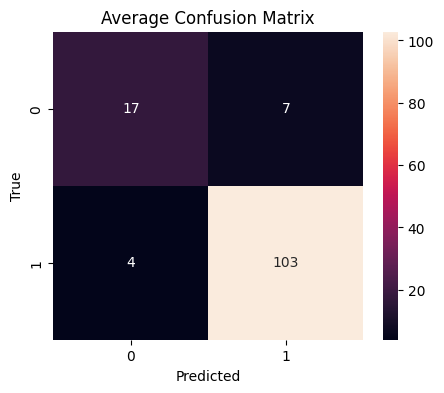

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.01, max_epoch=5)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

### Pengujian epoch = 7

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



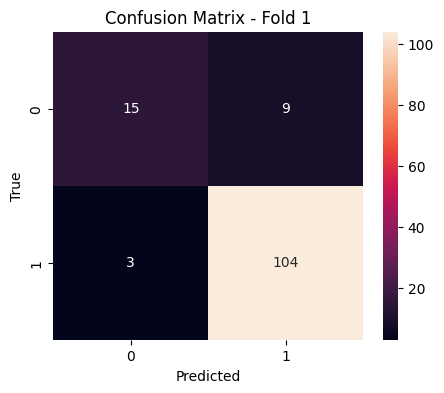

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



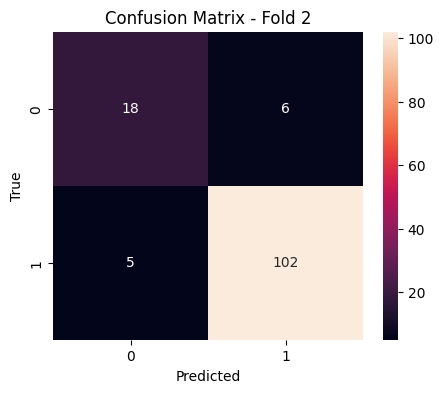

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



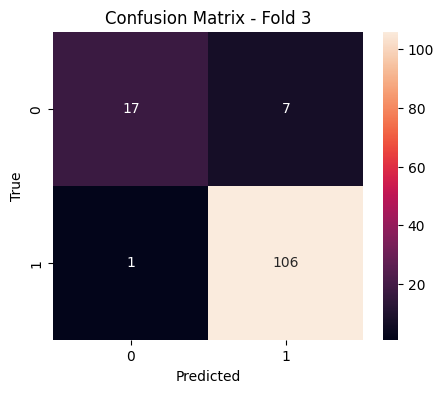

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.84%
  Precision = 0.9279279279279279
  Recall = 0.9626168224299065
  F1-Score = 0.944954128440367
  Confusion Matrix:
[[ 16   8]
 [  4 103]]



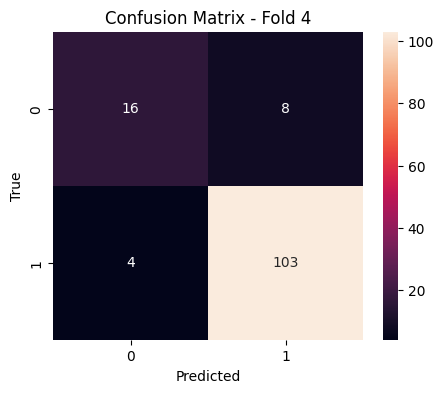

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 91.60%
  Precision = 0.9611650485436893
  Recall = 0.9339622641509434
  F1-Score = 0.9473684210526316
  Confusion Matrix:
[[21  4]
 [ 7 99]]



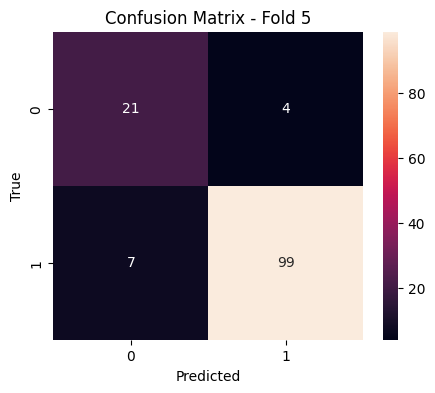

Average TP: 102.8
Average TN: 17.4
Average FP: 6.8
Average FN: 4.0
Average Accuracy: 91.76%
Average Precision: 0.9379562043795621
Average Recall: 0.9625468164794008
Average F1-Score: 0.9500924214417744



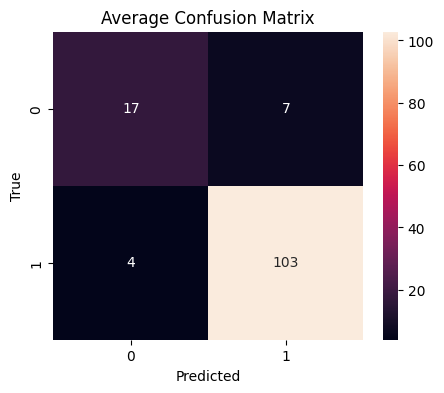

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.01, max_epoch=7)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

### Pengujian epoch = 9

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



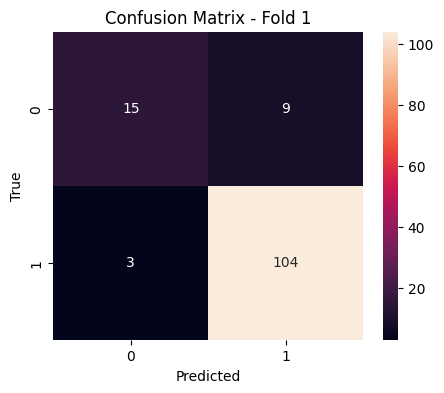

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



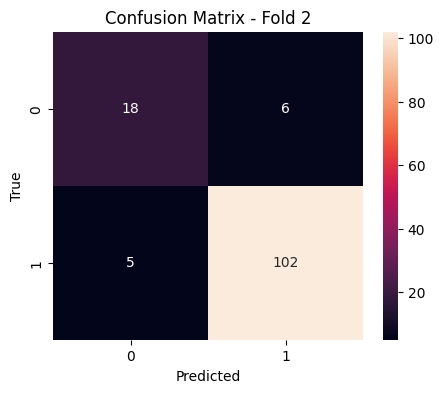

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



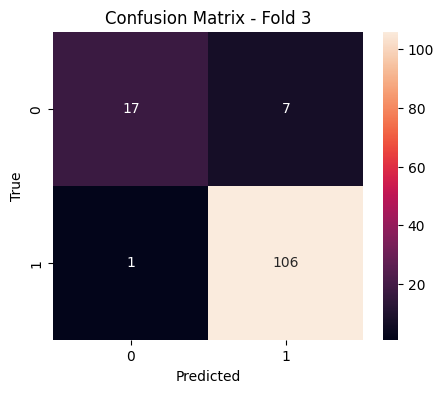

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.84%
  Precision = 0.9279279279279279
  Recall = 0.9626168224299065
  F1-Score = 0.944954128440367
  Confusion Matrix:
[[ 16   8]
 [  4 103]]



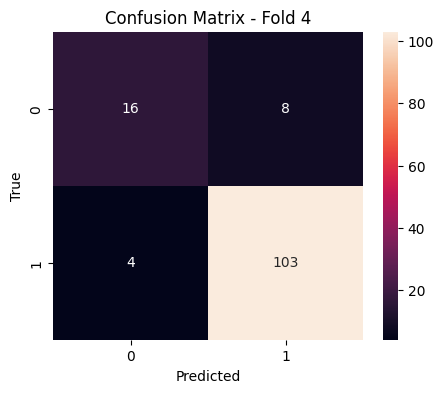

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 91.60%
  Precision = 0.9611650485436893
  Recall = 0.9339622641509434
  F1-Score = 0.9473684210526316
  Confusion Matrix:
[[21  4]
 [ 7 99]]



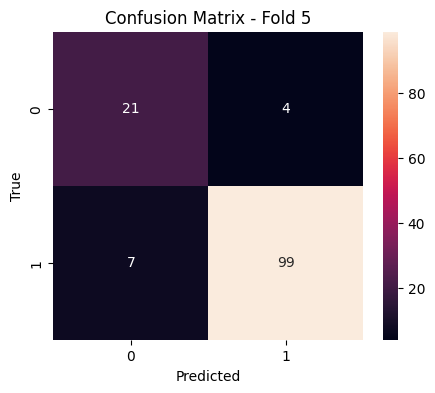

Average TP: 102.8
Average TN: 17.4
Average FP: 6.8
Average FN: 4.0
Average Accuracy: 91.76%
Average Precision: 0.9379562043795621
Average Recall: 0.9625468164794008
Average F1-Score: 0.9500924214417744



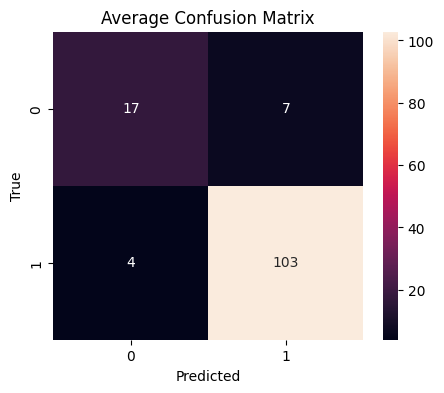

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.01, max_epoch=9)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

### Pengujian epoch = 10

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



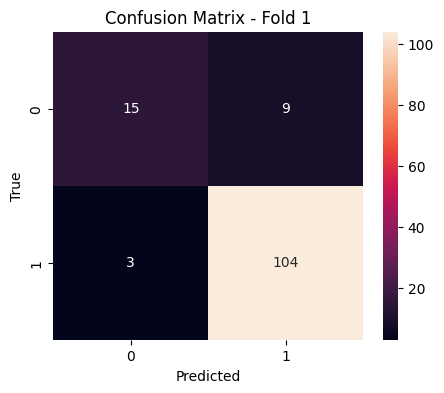

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



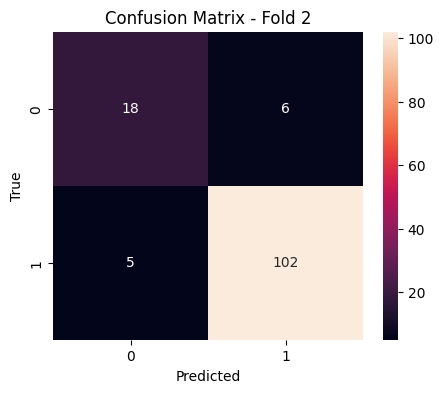

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



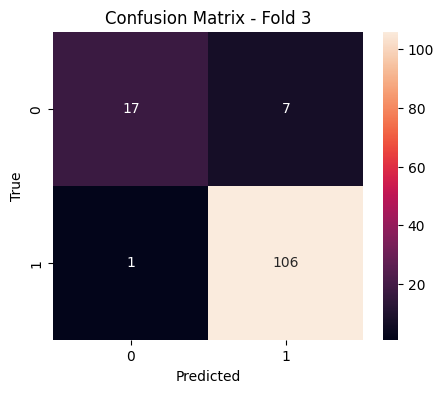

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.84%
  Precision = 0.9279279279279279
  Recall = 0.9626168224299065
  F1-Score = 0.944954128440367
  Confusion Matrix:
[[ 16   8]
 [  4 103]]



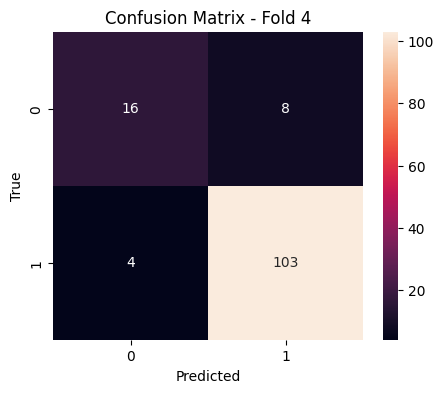

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 91.60%
  Precision = 0.9611650485436893
  Recall = 0.9339622641509434
  F1-Score = 0.9473684210526316
  Confusion Matrix:
[[21  4]
 [ 7 99]]



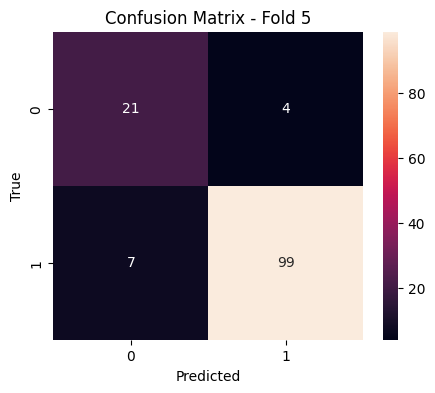

Average TP: 102.8
Average TN: 17.4
Average FP: 6.8
Average FN: 4.0
Average Accuracy: 91.76%
Average Precision: 0.9379562043795621
Average Recall: 0.9625468164794008
Average F1-Score: 0.9500924214417744



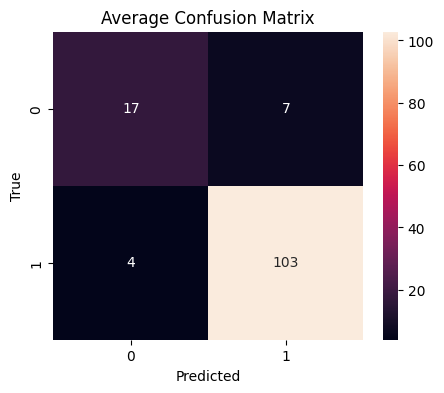

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.01, max_epoch=10)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

### Pengujian epoch = 20

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



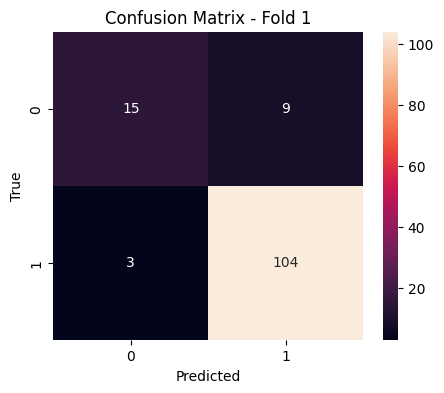

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



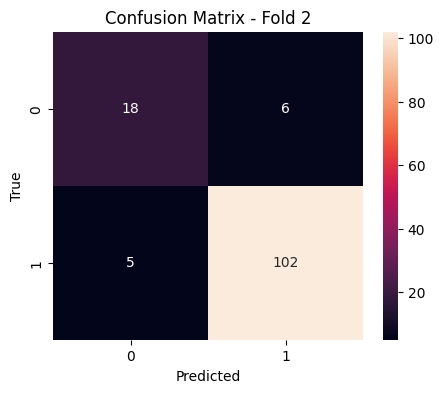

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



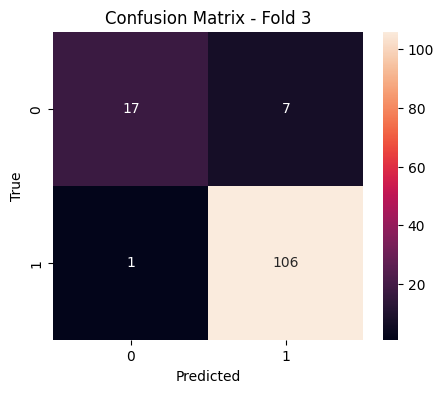

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.84%
  Precision = 0.9279279279279279
  Recall = 0.9626168224299065
  F1-Score = 0.944954128440367
  Confusion Matrix:
[[ 16   8]
 [  4 103]]



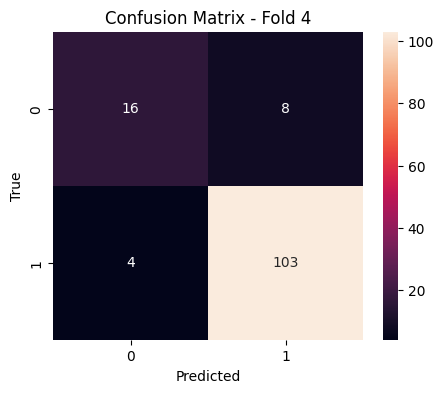

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 91.60%
  Precision = 0.9611650485436893
  Recall = 0.9339622641509434
  F1-Score = 0.9473684210526316
  Confusion Matrix:
[[21  4]
 [ 7 99]]



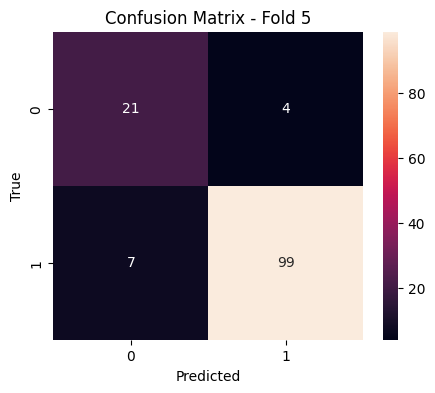

Average TP: 102.8
Average TN: 17.4
Average FP: 6.8
Average FN: 4.0
Average Accuracy: 91.76%
Average Precision: 0.9379562043795621
Average Recall: 0.9625468164794008
Average F1-Score: 0.9500924214417744



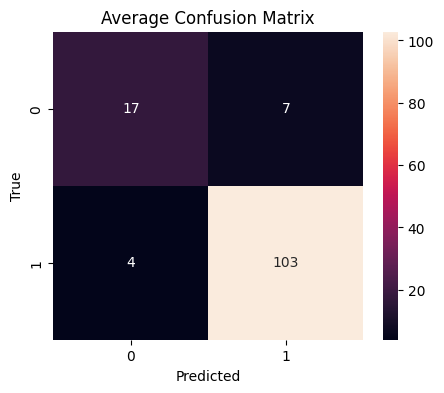

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.01, max_epoch=20)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

### Pengujian epoch = 30

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



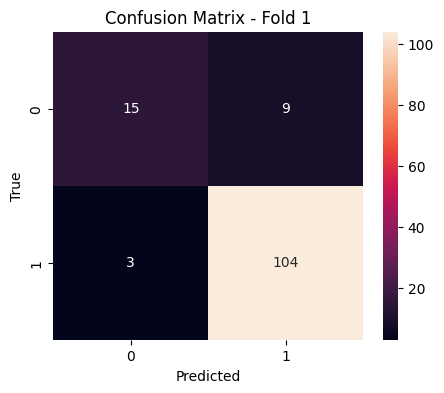

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



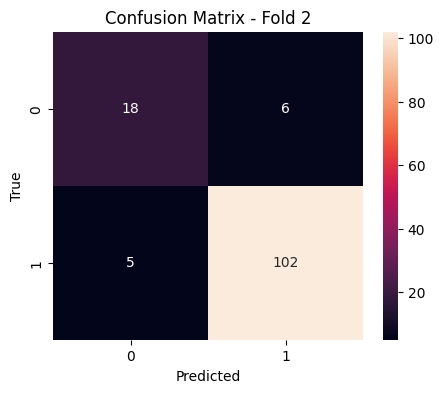

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



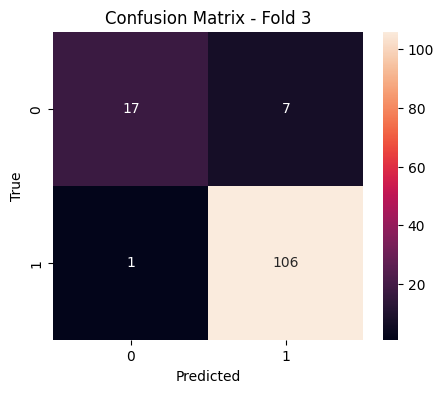

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.84%
  Precision = 0.9279279279279279
  Recall = 0.9626168224299065
  F1-Score = 0.944954128440367
  Confusion Matrix:
[[ 16   8]
 [  4 103]]



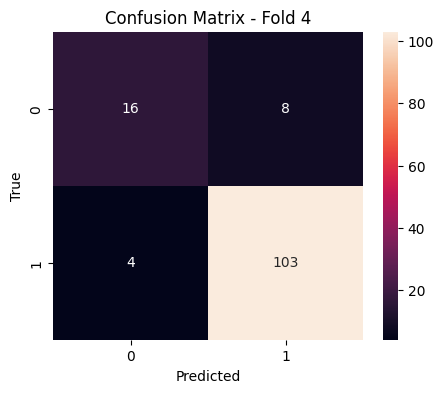

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 91.60%
  Precision = 0.9611650485436893
  Recall = 0.9339622641509434
  F1-Score = 0.9473684210526316
  Confusion Matrix:
[[21  4]
 [ 7 99]]



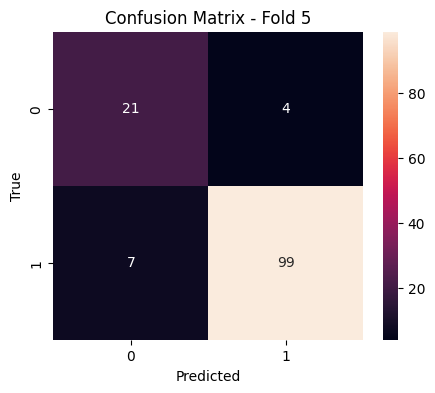

Average TP: 102.8
Average TN: 17.4
Average FP: 6.8
Average FN: 4.0
Average Accuracy: 91.76%
Average Precision: 0.9379562043795621
Average Recall: 0.9625468164794008
Average F1-Score: 0.9500924214417744



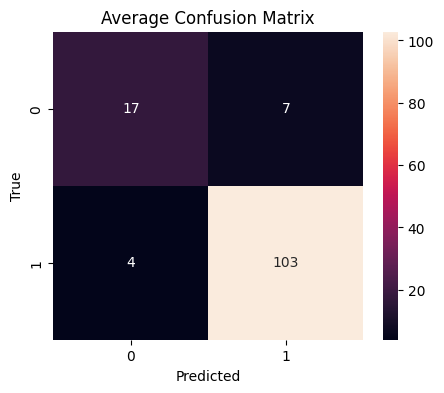

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.01, max_epoch=30)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

### Pengujian epoch = 40

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



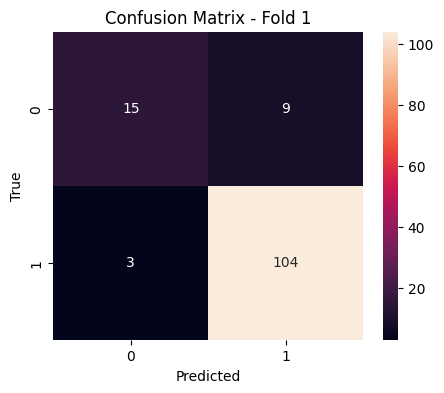

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



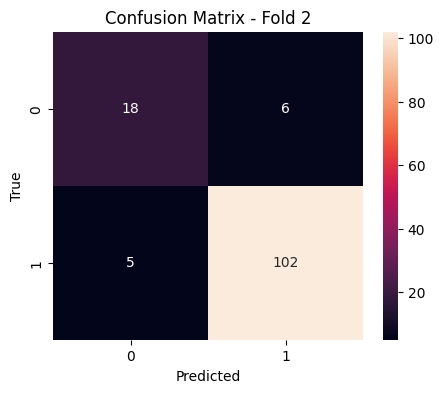

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



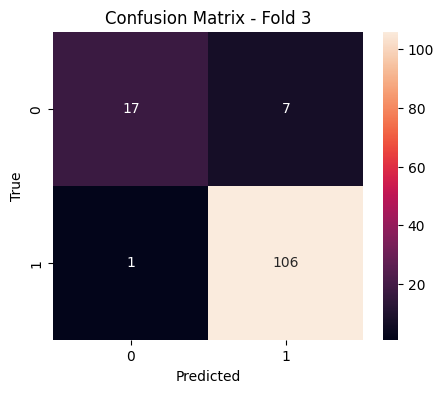

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.84%
  Precision = 0.9279279279279279
  Recall = 0.9626168224299065
  F1-Score = 0.944954128440367
  Confusion Matrix:
[[ 16   8]
 [  4 103]]



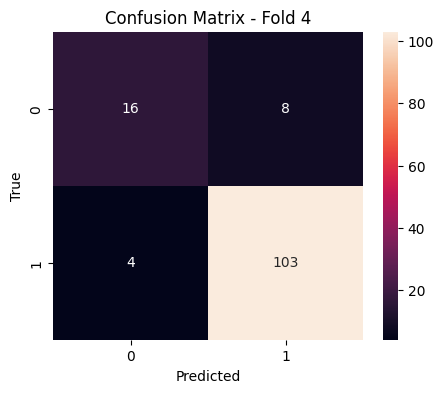

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 91.60%
  Precision = 0.9611650485436893
  Recall = 0.9339622641509434
  F1-Score = 0.9473684210526316
  Confusion Matrix:
[[21  4]
 [ 7 99]]



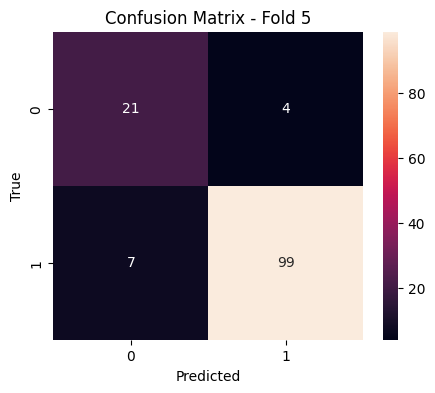

Average TP: 102.8
Average TN: 17.4
Average FP: 6.8
Average FN: 4.0
Average Accuracy: 91.76%
Average Precision: 0.9379562043795621
Average Recall: 0.9625468164794008
Average F1-Score: 0.9500924214417744



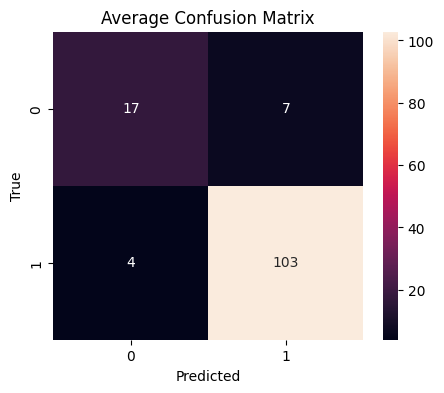

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.01, max_epoch=40)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

### Pengujian epoch = 50

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 90.84%
  Precision = 0.9203539823008849
  Recall = 0.9719626168224299
  F1-Score = 0.9454545454545454
  Confusion Matrix:
[[ 15   9]
 [  3 104]]



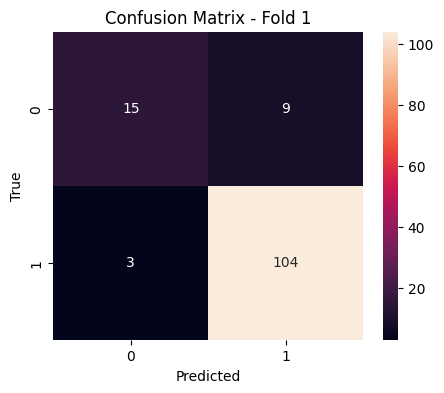

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 91.60%
  Precision = 0.9444444444444444
  Recall = 0.9532710280373832
  F1-Score = 0.9488372093023255
  Confusion Matrix:
[[ 18   6]
 [  5 102]]



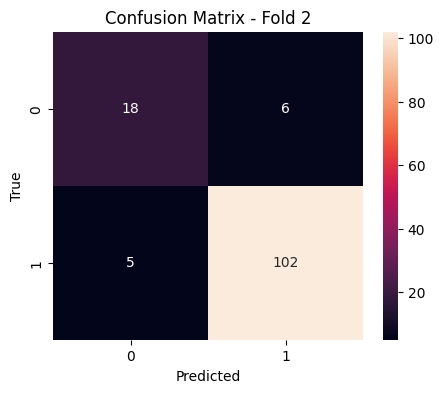

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 93.89%
  Precision = 0.9380530973451328
  Recall = 0.9906542056074766
  F1-Score = 0.9636363636363636
  Confusion Matrix:
[[ 17   7]
 [  1 106]]



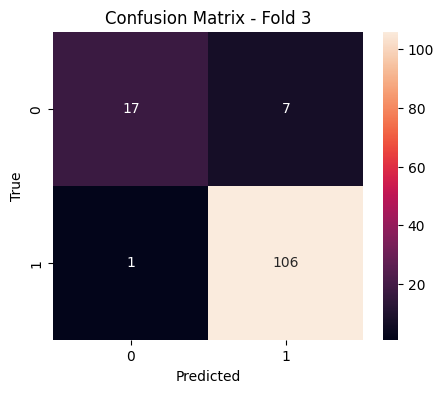

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 90.84%
  Precision = 0.9279279279279279
  Recall = 0.9626168224299065
  F1-Score = 0.944954128440367
  Confusion Matrix:
[[ 16   8]
 [  4 103]]



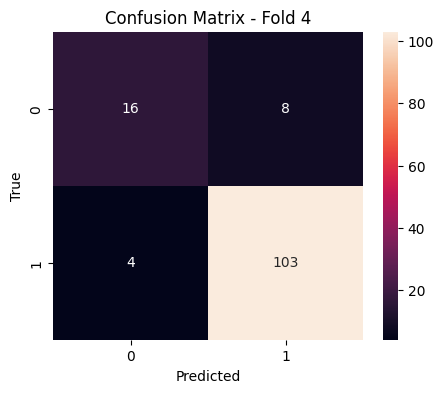

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 91.60%
  Precision = 0.9611650485436893
  Recall = 0.9339622641509434
  F1-Score = 0.9473684210526316
  Confusion Matrix:
[[21  4]
 [ 7 99]]



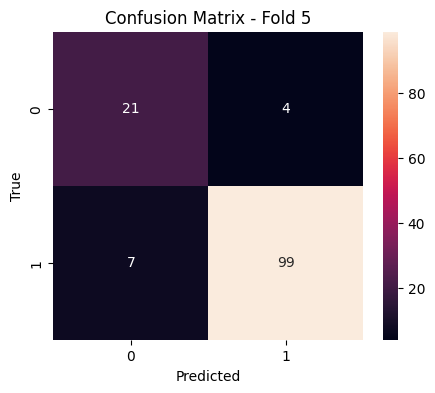

Average TP: 102.8
Average TN: 17.4
Average FP: 6.8
Average FN: 4.0
Average Accuracy: 91.76%
Average Precision: 0.9379562043795621
Average Recall: 0.9625468164794008
Average F1-Score: 0.9500924214417744



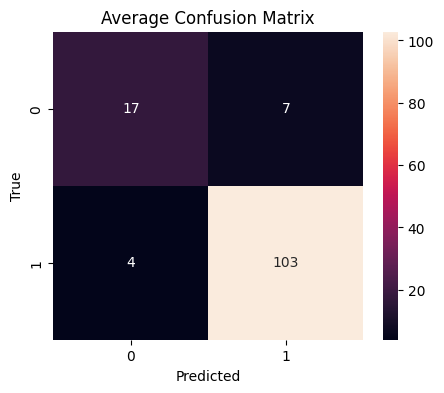

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(dataset, target), 1):
    X_train, X_test = dataset.iloc[train_index].values, dataset.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.01, max_epoch=50)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

## Tanpa Lexicon Based Features

In [ ]:
import pandas as pd
tfidf_matrix = pd.read_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/FIX/hasil_tfidf.csv', encoding='latin1')

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 1:
  Accuracy = 81.68%
  Precision = 0.816793893129771
  Recall = 1.0
  F1-Score = 0.8991596638655461
  Confusion Matrix:
[[  0  24]
 [  0 107]]



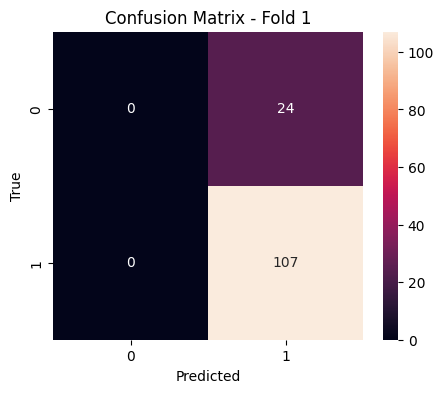

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 2:
  Accuracy = 81.68%
  Precision = 0.816793893129771
  Recall = 1.0
  F1-Score = 0.8991596638655461
  Confusion Matrix:
[[  0  24]
 [  0 107]]



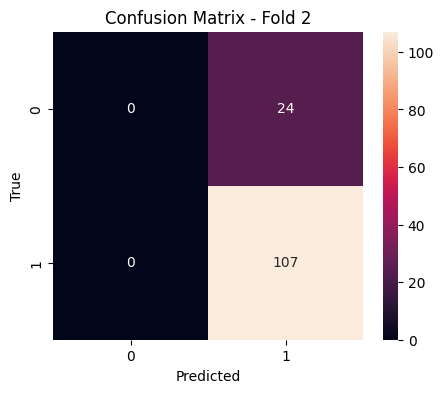

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 3:
  Accuracy = 85.50%
  Precision = 0.8492063492063492
  Recall = 1.0
  F1-Score = 0.9184549356223175
  Confusion Matrix:
[[  5  19]
 [  0 107]]



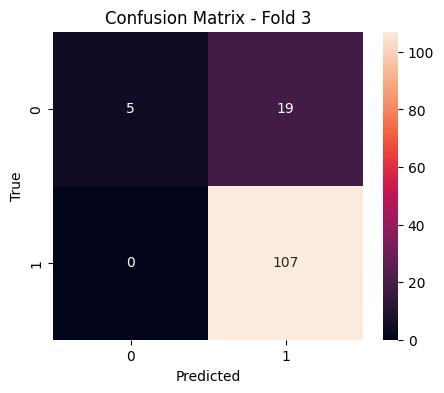

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 4:
  Accuracy = 81.68%
  Precision = 0.816793893129771
  Recall = 1.0
  F1-Score = 0.8991596638655461
  Confusion Matrix:
[[  0  24]
 [  0 107]]



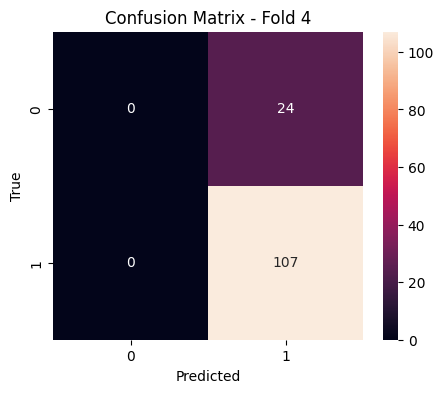

<ipython-input-1-d56ecfb239d0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Fold 5:
  Accuracy = 83.97%
  Precision = 0.8346456692913385
  Recall = 1.0
  F1-Score = 0.9098712446351932
  Confusion Matrix:
[[  4  21]
 [  0 106]]



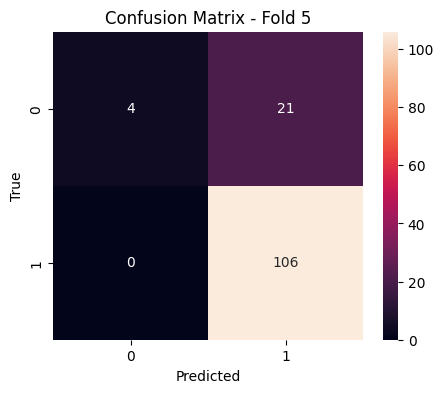

Average TP: 106.8
Average TN: 1.8
Average FP: 22.4
Average FN: 0.0
Average Accuracy: 82.90%
Average Precision: 0.826625386996904
Average Recall: 1.0
Average F1-Score: 0.9050847457627119



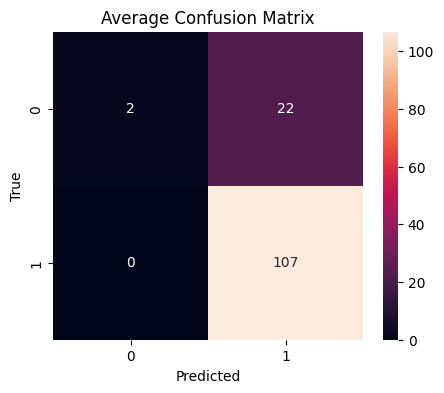

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize metrics
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
conf_matrix_list = []

# Initialize variables for manual calculation
total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0

for fold, (train_index, test_index) in enumerate(skf.split(tfidf_matrix, target), 1):
    X_train, X_test = tfidf_matrix.iloc[train_index].values, tfidf_matrix.iloc[test_index].values
    y_train, y_test = target.iloc[train_index].values, target.iloc[test_index].values

    # Train the model
    model = lvq_fit(X_train, y_train, learning_rate=0.1, b=0.01, max_epoch=3)

    # Test the model
    output = lvq_predict(X_test, model)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, output)

    # Manual calculation for each fold
    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn

    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Append metrics to lists
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for each fold
    print(f'Fold {fold}:')
    print(f'  Accuracy = {accuracy * 100:.2f}%')
    print(f'  Precision = {precision}')
    print(f'  Recall = {recall}')
    print(f'  F1-Score = {f1}')
    print(f'  Confusion Matrix:')
    print(conf_matrix)
    print()

    # Visualize Confusion Matrix for each fold
    f, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# Manual calculation for average values
average_tp = total_tp / k_folds
average_tn = total_tn / k_folds
average_fp = total_fp / k_folds
average_fn = total_fn / k_folds

# Calculate average metrics manually
average_accuracy = (average_tp + average_tn) / (average_tp + average_fp + average_tn + average_fn)
average_precision = average_tp / (average_tp + average_fp) if (average_tp + average_fp) > 0 else 0
average_recall = average_tp / (average_tp + average_fn) if (average_tp + average_fn) > 0 else 0
average_f1 = (2 * average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) > 0 else 0

# Print manual calculations
print(f'Average TP: {average_tp}')
print(f'Average TN: {average_tn}')
print(f'Average FP: {average_fp}')
print(f'Average FN: {average_fn}')
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1-Score: {average_f1}')
print()

# Visualize average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

# Root Cause Analysis

## Belum di Preprocessing

In [ ]:
import pandas as pd

# Ganti 'path/ke/file.csv' dengan path file CSV Anda
data_rca = '/content/drive/MyDrive/KULIAH/SEMESTER 7 - SKRIPSI /Skripsi/Implementasi/Data (6)/Data negatif beraspek.csv'

# Membaca DataFrame dari file CSV
df = pd.read_csv(data_rca)
# Membersihkan spasi ekstra dari nama kolom
df.columns = df.columns.str.strip()

# Membagi DataFrame berdasarkan nilai dalam kolom 'Kategori aspek' dan 'Label Data' negatif
df_aspek_toko = df.loc[(df['Kategorisasi Aspek'] == 'Toko')]
df_aspek_harga = df.loc[(df['Kategorisasi Aspek'] == 'Harga')]
df_aspek_pelayanan = df.loc[(df['Kategorisasi Aspek'] == 'Pelayanan')]
df_aspek_buku = df.loc[(df['Kategorisasi Aspek'] == 'Buku')]
df_aspek_pengiriman = df.loc[(df['Kategorisasi Aspek'] == 'Pengiriman')]

# Menampilkan hasil
print("Data Aspek Toko:")
display(df_aspek_toko)
print()

print("\nData Aspek Harga:")
display(df_aspek_harga)
print()

print("\nData Aspek Pelayanan:")
display(df_aspek_pelayanan)
print()

print("\nData Aspek Buku:")
display(df_aspek_buku)
print()

print("\nData Aspek Pengiriman:")
display(df_aspek_pengiriman)
print()


Data Aspek Toko:


Ulasan Kategorisasi Aspek  \
4         \nArea parkir dijajahi tukang parkir 👎\n\n\n               Toko   
5    jual makanan ringan dan minuman didalamnya yan...               Toko   
6                          Penataan buku kurang rapi.                Toko   
7                              Ruangan terasa sempit.                Toko   
9              Buku tentang bioteknologi sel tidak ada               Toko   
10   hanya kalau tanya persediaan masih harus nanya...               Toko   
11   masih kurang lengkap bukunya, harap dosen UB l...               Toko   
12   Selalu tutup...tiap ke bank jatim ingin mampir...               Toko   
13            menurut saya toko bukunya kurang lengkap               Toko   
14                        Tutup dan kesannya tdk aktif               Toko   
15                                 Tidak cukup lengkap               Toko   
28                          barangnya sedang kosong...               Toko   
120  Buku pembahasan ON MIPA PT fisika modern tidak...               Toko   

    Label Data  
4      Negatif  
5      Negatif  
6      Negatif  
7      Negatif  
9      Negatif  
10     Negatif  
11     Negatif  
12     Negatif  
13     Negatif  
14     Negatif  
15     Negatif  
28     Negatif  
120    Negatif



Data Aspek Harga:


Ulasan Kategorisasi Aspek  \
36  kalau bs hargane agak diturunkan sedikit, trim...              Harga   
43  Dengan harga 114.000 tampilan dalam tidak berw...              Harga   
45  harganya... sesuai... walau agak sedikit kemah...              Harga   
46  Hanya saja perlu diperbaiki lagi kualitas penj...              Harga   
50           Buku standar sj. Harga sekian agak mahal              Harga   
54  untuk bukunya, ternyata tipis sehingga hargany...              Harga   
59  saran buat UB Press harganya lumayan mahal mun...              Harga   
60  saran buat UB Press harganya lumayan mahal mun...              Harga   
61  saran buat UB Press harganya lumayan mahal mun...              Harga   
64  Kemudian dg harga buku ini saya pikir lebih da...              Harga   
65  Harga yang cukup mahal utk buku yang isinya ti...              Harga   
67  Saran buat UB Press kualitas kertas sudah ditu...              Harga   

   Label Data  
36    Negatif  
43    Negatif  
45    Negatif  
46    Negatif  
50    Negatif  
54    Negatif  
59    Negatif  
60    Negatif  
61    Negatif  
64    Negatif  
65    Negatif  
67    Negatif



Data Aspek Pelayanan:


Ulasan Kategorisasi Aspek  \
8            Tidak ada petugas untuk konsultasi buku.           Pelayanan   
16                             cuma admin slow respon.          Pelayanan   
17                            pesen 2 yg datang cuma 1          Pelayanan   
18             saya pesen 2 buku tapi yg datang cuma 1          Pelayanan   
19                saya komplain belum ada pengembalian          Pelayanan   
23   respons penjual agak lambat (mungkin terkait j...          Pelayanan   
25   proses penggantian dan pengembalian yang lebih...          Pelayanan   
26   toko 24 jam tapi dikirim pas mau habis limit w...          Pelayanan   
27   toko 24 jam tapi kirim nunggu batas limit peng...          Pelayanan   
29   Saya mesennya buku dasar tht, tapi malah dikir...          Pelayanan   
31   Terlambat karena tidak terikut di pengiriman p...          Pelayanan   
32                        ada bagian yg peyok sedikit           Pelayanan   
34   hanya saja mungkin untuk bubble wrap nya bisa ...          Pelayanan   
40                            Asalnya salah kirim buku          Pelayanan   
41                       barang (buku) nya salah kirim          Pelayanan   
71   Kamu dapat 3 feedback negatif karena tidak men...          Pelayanan   
72   Kamu dapat 3 feedback negatif karena tidak mem...          Pelayanan   
73   Kamu dapat 3 feedback negatif karena tidak mem...          Pelayanan   
74   Kamu dapat 1 feedback negatif karena tidak mem...          Pelayanan   
75   Kamu dapat 1 feedback negatif karena tidak mem...          Pelayanan   
76   Kamu dapat 1 feedback negatif karena 5 kali me...          Pelayanan   
77   Kamu dapat 3 feedback negatif karena tidak men...          Pelayanan   
78   Kamu dapat 3 feedback negatif karena tidak men...          Pelayanan   
79   Kamu dapat 1 feedback negatif karena 5 kali me...          Pelayanan   
80   Kamu dapat 1 feedback negatif karena tidak mem...          Pelayanan   
81   Kamu dapat 3 feedback negatif karena tidak men...          Pelayanan   
82   Kamu dapat 3 feedback negatif karena tidak men...          Pelayanan   
83   Kamu dapat 3 feedback negatif karena tidak men...          Pelayanan   
84   Kamu dapat 1 feedback negatif karena 5 kali me...          Pelayanan   
85   Kamu dapat 1 feedback negatif karena tidak mem...          Pelayanan   
86   Kamu dapat 3 feedback negatif karena tidak men...          Pelayanan   
87   Kamu dapat 1 feedback negatif karena 5 kali me...          Pelayanan   
92                            Respon chat cukup lambat          Pelayanan   
95                            Respon Chat Kurang Cepat          Pelayanan   
97   Pelapak mendapatkan 3 feedback negatif karena ...          Pelayanan   
98   Pelapak tidak memproses dan mengirimkan barang...          Pelayanan   
99        Feedback negatif karena menolak 5 transaksi.          Pelayanan   
100  Pelapak tidak memproses dan mengirimkan barang...          Pelayanan   
101                       Barang Tidak Sesuai Pesanan.          Pelayanan   
102  Pelapak tidak memproses dan mengirimkan barang...          Pelayanan   
103  Pelapak tidak memproses dan mengirimkan barang...          Pelayanan   
105  Pelapak tidak dapat melayani pemesanan melalui...          Pelayanan   
106       Feedback negatif karena menolak 5 transaksi.          Pelayanan   
107  Pelapak tidak dapat melayani pemesanan melalui...          Pelayanan   
108  Pelapak tidak dapat melayani pemesanan melalui...          Pelayanan   
109                  buku yang dikirim berbeda gan,,!!          Pelayanan   
112  Pelapak mendapatkan 3 feedback negatif karena ...          Pelayanan   
115  Pelapak tidak dapat melayani pemesanan melalui...          Pelayanan   
116       Feedback negatif karena menolak 5 transaksi.          Pelayanan   
117  Perekat halaman buku gampang sobek, sehingga b...          Pelayanan   
118  Pelapak tidak dapat melayani pemesanan melalui...          Pelayanan   
119  Pelapak mendapatkan 3 feedback negatif 



Data Aspek Buku:


Ulasan Kategorisasi Aspek  \
30                                       Kurang jelas               Buku   
33  hanya saja di halaman cover depan sedikit sepe...               Buku   
35  Pembahasan menggunakan R sangat sedikit, tidak...               Buku   
39            ada satu halaman yang teksnya terpotong               Buku   
44                   Saya kira tebal.. ternyata tipis               Buku   
48  Dapet cetakan pertama 2012, pdhl butuh yg ceta...               Buku   
51  Hanya saja hama dan penyakit berdasarkan varie...               Buku   
56                    tapi isi bukunya kurang lengkap               Buku   
62  Namun hal yang paling fatal adalah banyak seka...               Buku   
63  sepertinya tidak dilakukan editing padahal ini...               Buku   
66  isinya agak kurang dari harapan, beda dari pal...               Buku   
68                             kertasnya mudah copot.               Buku   
69  jadi belum lama ini sudah banyak yang copot ha...               Buku   
88  Ini beneran UB Press Official Store bukan ya ?...               Buku   
89  Gambar hanya hitam putih dengan tulisan yang t...               Buku   
90  Bukunya copyan alias tidak asli. Sangat disaya...               Buku   
91  pada buku "good environmental governance" ada ...               Buku   
93                           Cetaknnya kurang bagus..               Buku   

   Label Data  
30    Negatif  
33    Negatif  
35    Negatif  
39    Negatif  
44    Negatif  
48    Negatif  
51    Negatif  
56    Negatif  
62    Negatif  
63    Negatif  
66    Negatif  
68    Negatif  
69    Negatif  
88    Negatif  
89    Negatif  
90    Negatif  
91    Negatif  
93    Negatif



Data Aspek Pengiriman:


Ulasan Kategorisasi Aspek  \
0                                      Pengiriman lama         Pengiriman   
1    pengirimannya lumayan lamaa ya lebih lama dari...         Pengiriman   
2    terus ada defect dikit di buku yang satu krn k...         Pengiriman   
3                    Cuma ga bisa pakai gratis ongkir.         Pengiriman   
20                                sempat salah alamat          Pengiriman   
21   cuma pengiriman agak lama padahal jarak gk ter...         Pengiriman   
22   cuma pengiriman agak lama padahal jarak gk ter...         Pengiriman   
24               salah kirim, menimbulkan biaya waktu          Pengiriman   
37                                         lama bosque         Pengiriman   
38             Ada cacat di ujung buku, tp lumayan lah         Pengiriman   
42     Ada kerusakan sedikit pada cover tapi it's okay         Pengiriman   
47           waktu pengiriman saja yg harus dipercepat         Pengiriman   
49                Hanya saja pengirimannya sdikit lama         Pengiriman   
52   Pengiriman agak lama karena memang lokasi nya ...         Pengiriman   
53                                nyampenya agaka lama         Pengiriman   
55         hanya terkendala pengirimannya yg agak lama         Pengiriman   
57         pengiriman kurang cepat meski pakai JNE YES         Pengiriman   
58   Sebenarnya saya berharap barang dtg dihari sab...         Pengiriman   
70   telat nyampenya, baru terima minggu pagi, yg s...         Pengiriman   
94                                   pengiriman lama..         Pengiriman   
96                                         Lama Sampai         Pengiriman   
104                                        Lama sampai         Pengiriman   
110                                        Lama Sampai         Pengiriman   
111                                      lambat sampai         Pengiriman   
113                                        Lama Sampai         Pengiriman   
114  Cuma mungkin ekspedisi yang agak lambat.. pdhl...         Pengiriman   

    Label Data  
0      Negatif  
1      Negatif  
2      Negatif  
3      Negatif  
20     Negatif  
21     Negatif  
22     Negatif  
24     Negatif  
37     Negatif  
38     Negatif  
42     Negatif  
47     Negatif  
49     Negatif  
52     Negatif  
53     Negatif  
55     Negatif  
57     Negatif  
58     Negatif  
70     Negatif  
94     Negatif  
96     Negatif  
104    Negatif  
110    Negatif  
111    Negatif  
113    Negatif  
114    Negatif

Top 3 kata yang paling sering muncul pada Aspek Toko:
ada: 4
buku: 4
dan: 3
kurang: 3
tidak: 3


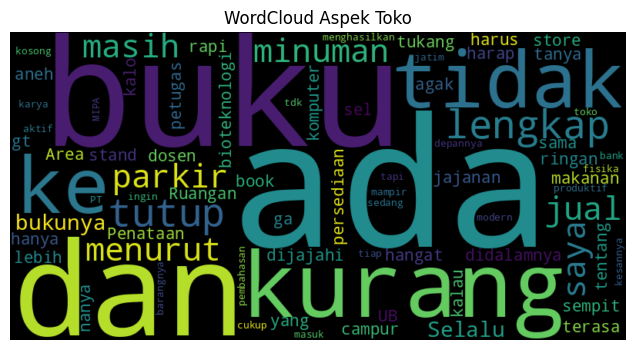


Top 3 kata yang paling sering muncul pada Aspek Harga:
mahal: 7
harga: 5
harganya: 5
mungkin: 4
saran buat: 4


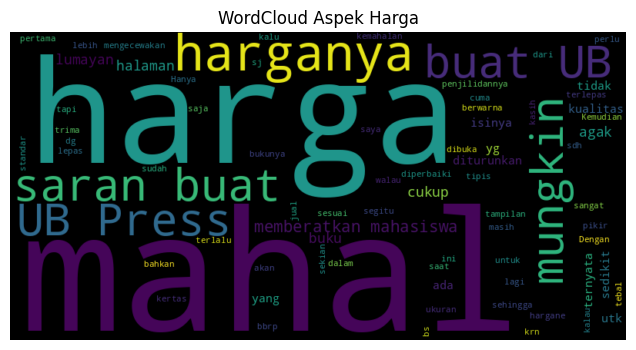


Top 3 kata yang paling sering muncul pada Aspek Pelayanan:
feedback negatif: 23
negatif karena: 23
karena tidak: 17
Kamu dapat: 17
dapat feedback: 17


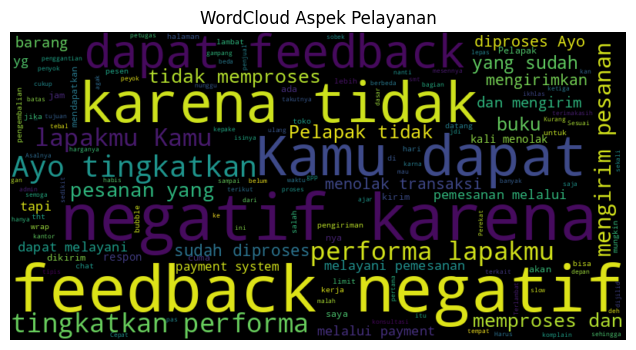


Top 3 kata yang paling sering muncul pada Aspek Buku:
yang: 6
tidak: 5
ini: 5
kurang: 4
hanya: 3


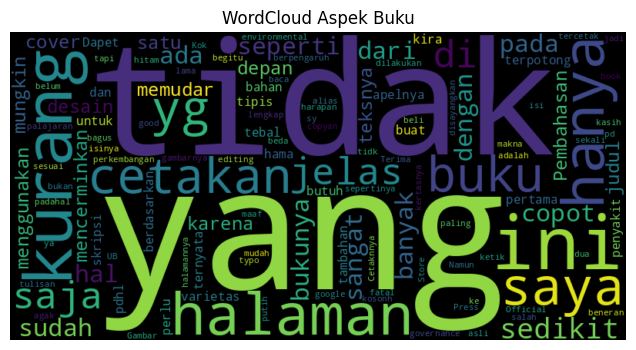


Top 3 kata yang paling sering muncul pada Aspek Pengiriman:
lama: 14
pengiriman: 7
cuma: 5
agak: 5
Sampai: 5


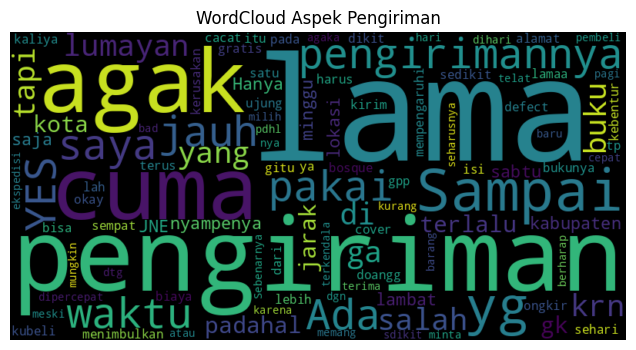

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk membuat dan menampilkan WordCloud dengan urutan kata yang sering muncul
def create_and_display_wordcloud(df_aspek, aspek_name):
    # Menggabungkan semua ulasan menjadi satu teks
    text_aspek = ' '.join(df_aspek['Ulasan'])

    # Membuat WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=STOPWORDS).generate(text_aspek)

    # Mendapatkan frekuensi kata
    word_frequencies = wordcloud.process_text(text_aspek)

    # Mengurutkan frekuensi kata
    sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

    # Menampilkan 3 kata yang paling sering muncul
    top_words = sorted_word_frequencies[:5]
    print(f"Top 3 kata yang paling sering muncul pada Aspek {aspek_name}:")
    for word, frequency in top_words:
        print(f"{word}: {frequency}")

    # Menampilkan WordCloud menggunakan matplotlib
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud Aspek {aspek_name}')
    plt.show()

# Membuat dan menampilkan WordCloud untuk setiap aspek
create_and_display_wordcloud(df_aspek_toko, 'Toko')
print()
create_and_display_wordcloud(df_aspek_harga, 'Harga')
print()
create_and_display_wordcloud(df_aspek_pelayanan, 'Pelayanan')
print()
create_and_display_wordcloud(df_aspek_buku, 'Buku')
print()
create_and_display_wordcloud(df_aspek_pengiriman, 'Pengiriman')
print()
